# Modelo Preditivo de Classificação - Concessão de Crédito

Neste case irei abordar a criação de modelo preditivos supervisionados, de classificação, utilizando os principais algoritmos de Machine Learning, e irei testar sua performance e taxa de acerto visando buscar o melhor modelo de risco preditivo criado.

Para a criação de modelos classificatórios utilizarei um dataset de risco de concessão de crédito, onde o objetivo é classificar os clientes em altas chances de concessão e baixas chances de concessãro de acordo com suas informações pessoais de cunho pessoal e financeiro.

## 1) Importando algumas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 2) Leitura do dataset

O dataset possui 1000 linhas e 21 colunas, onde 20 destas colunas serão usadas como features para criação do modelo preditivo, uma vez que guardam informações de cunho pessoal e financeiro de cada um dos 1000 clientes do banco, e 1 das colunas é a variável target default que classifica o cliente como ARRISCADO (1) ou NÃO ARRISCADO (0). 

O modelo deverá ser responsável por treinar estas informações e aprender uma boa maneira de classificar os futuros clientes que visam entrar neste banco.

##### *Features:

-conta_corrente: range de valores na conta corrente

-prazo_emprestimo_meses: Valor em meses de empréstimo

-historico_credito: Informação sobre pagamento dos créditos concedidos

-proposito_emprestimo: Motivo do empréstimo concedido

-valor_emprestimo: Valor que foi pego para empréstimo

-reserva_cc: Quantidade de valor guardado

-tempo_emprego_atual: Tempo em que o cliente se encontra empregado

-sexo_est_civil: Sexo e estado civil

-outros_fiadores: Tipos de fiadores

-anos_residencia_atual: Anos que possui uma residencia

-propriedade: Tipo de propriedade que possui

-Idade: Idade do cliente

-outros_planos_financiamento: Outros tipos de planos financeiros que o cliente possui

-tipo_residencia: Qual o tipo de residência

-n_creditos_banco: Quantas vezes pegou crédito do banco

-status_emprego: Status atual do emprego

-n_dependentes: Número de dependentes

-telefone: Se possui ou não telefone para contato

-trabalhador_estrangeiro: Se é ou não trabalhador estrangeiro

##### * Target:
-default: Classifica o cliente como ARRISCADO (1) ou NÃO (0)

In [2]:
# Setar a opção de visualização para todas as colunas
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_table('C:/Users/lucas/Downloads/Alura/Machine Learning/ML Scoring Credit/base.txt',sep=',')
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## 3) Análises preliminares

Para que o modelo performe muito bem é ideal que o dataset esteja limpo e puro, as vezes um dataset bem transformado já resolve qualquer problema de performance complexo que o modelo precisa passar para ser reajustado. 

Para isso é ideal retirar valores duplicados ou nulos que possam atrapalhar a performance de precisão do modelo (veficar antes se é necessário simplesmente deletar os valores. Alguns casos é necessário mantê-los ou até mesmmo substituir por algum outro valor que sejá útil. Por exemplo: se tivessemos valores nulos de renda e é indispensável a participação deste dado no modelo, então seria interessante preenche-lo com a mediana dos valores).

* Tamanho da base:

In [4]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas


* Dados duplicados:

In [5]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 0 dados duplicados


* Dados Nulos:

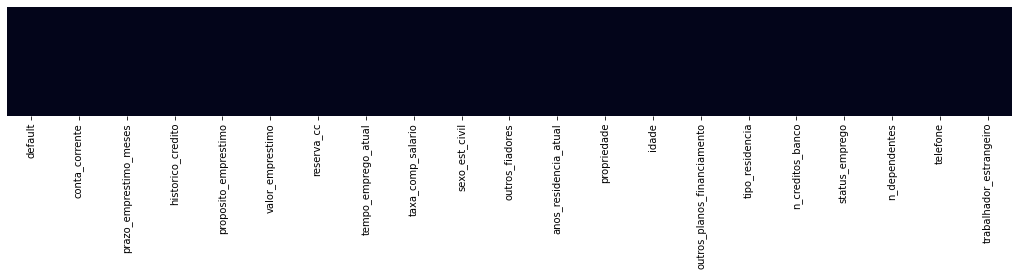

In [6]:
# Checando valores nulos
plt.figure(figsize=(18,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

In [7]:
nulos = df.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64 dados nulos


* Verificando os tipos de dados:

As variáveis com valores do tipo object estão sendo utilizadas como uma faixa de range de acordo com os valores da feature. Por exemplo a feature conta_corrente em que temos: 

<0 DM; <=...<=200DM; >=200DM; no checking account; salary assignments for at least 1 year. 

Todas elas deverão passar pelo processo de feature engineering para que o modelo possa performar da melhor forma possível.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

## 4) Extração de Insights

* Gráfico de Barras: Distribuição por Sexo/Estado civil, Variável Target e Idade

In [9]:
barras = ['sexo_est_civil', 'default','idade']

In [10]:
lista_hist = list(enumerate(barras))

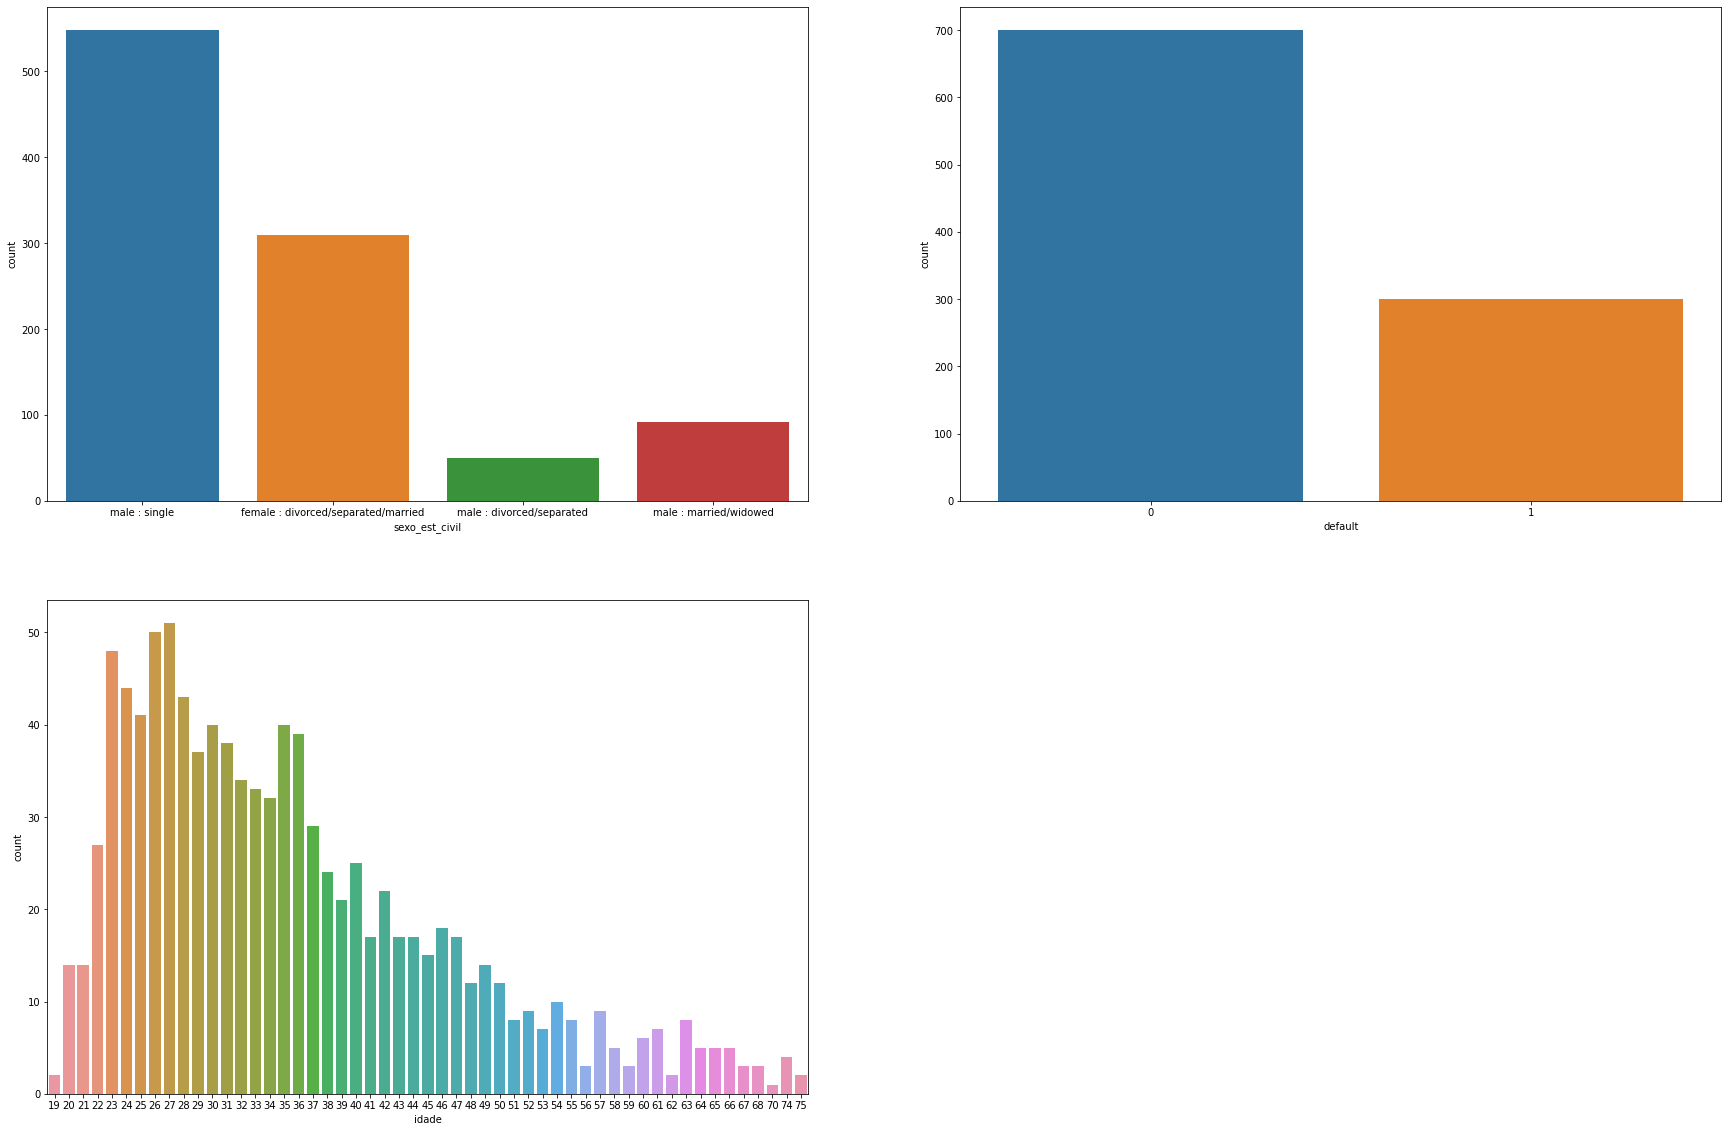

In [11]:
plt.figure(figsize = (30,20))

for i in lista_hist:
    plt.subplot(2,2,i[0]+1) #2 linhas, 2 colunas e quantos gráficos plotaremos (1+ outros da listas...)
    sns.countplot(x = i[1], data = df)

-A variável default apresenta 70% de concessão de crédito para clientes que consideraram não arriscados (0) e 30% que não receberam créditos por serem considerados arriscados (1)

-Em frequência observa-se que o público masculino e solteiro é o mais presente no dataset de clientes do banco, seguido pelo femino, masculino casado/viúvo e por último pelo masculino divorciado/separado.

-Pela distribuição de idade podemos ver que há uma concentração do público nas idades entre 22-37, se tratando assim de um perfil de público jovem para este banco

* Perfil do público por Idade e Sexo/Estado Civil

Text(0.5, 1.0, 'Ditribuição de Idade por sexo e estado civil')

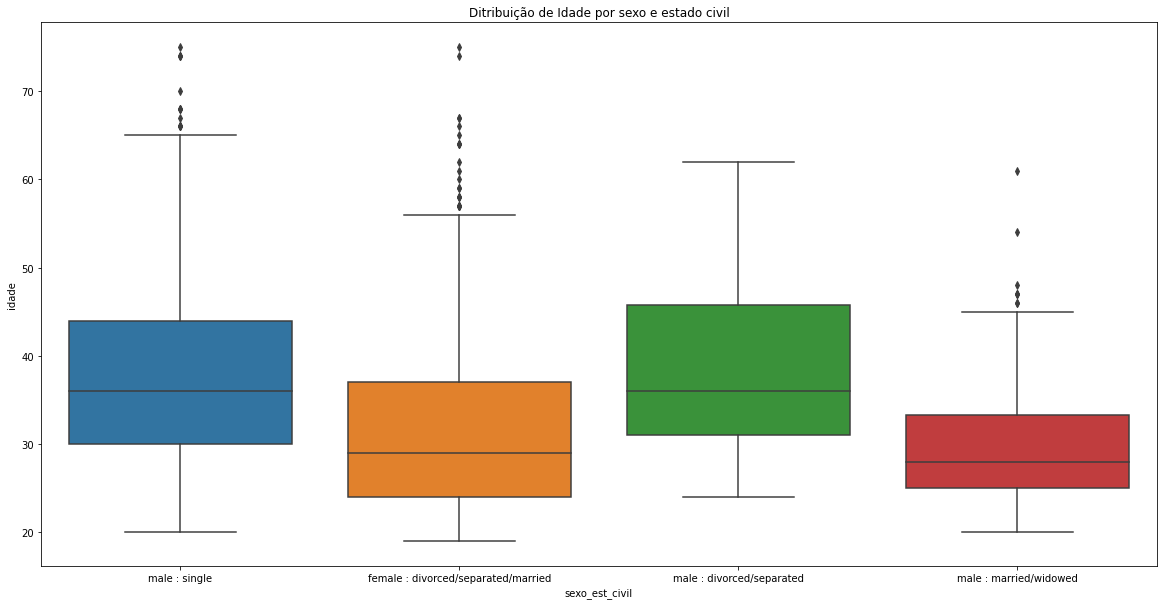

In [12]:
plt.figure(figsize = (20,10))

sns.boxplot(x='sexo_est_civil', y='idade', data = df)
plt.title('Ditribuição de Idade por sexo e estado civil')

Observa-se pelo boxplot que a mediana da Idade é maior no público de homens solteiros e divorciados/separados em relação ao público feminino independente do status matrimonial e aos homens casados/viúvos

* Valor do empréstimo x Prazo do empréstimo em meses

Text(0.5, 1.0, 'Valor de empréstimo x Prazo de empréstimo em meses')

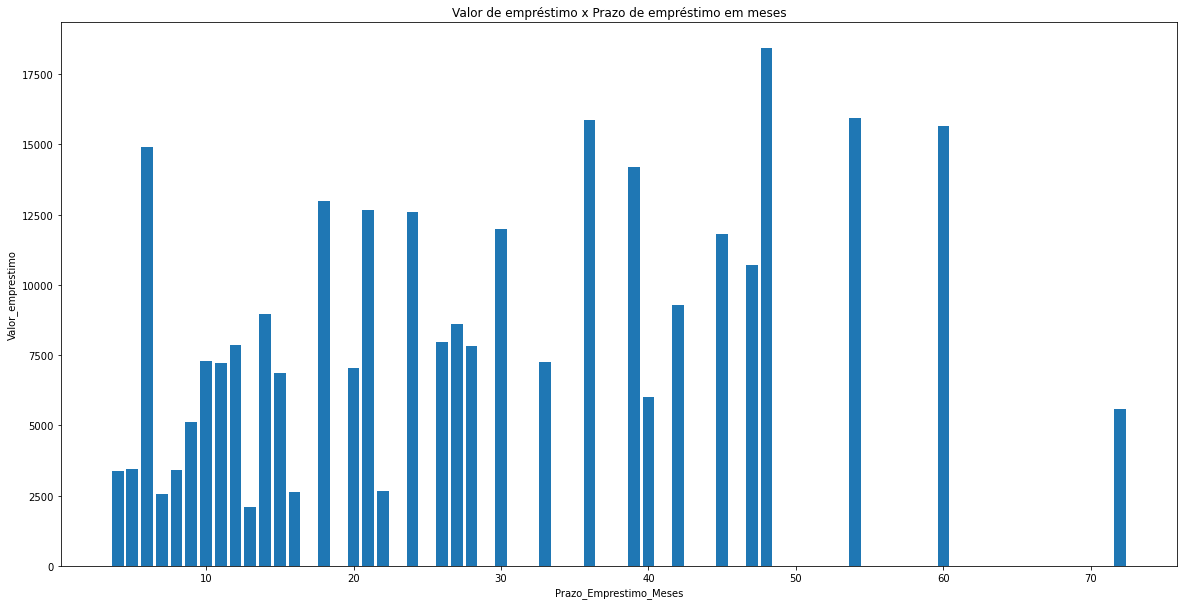

In [13]:
plt.figure(figsize = (20,10))
plt.bar(df.prazo_emprestimo_meses,df.valor_emprestimo)
plt.xlabel('Prazo_Emprestimo_Meses')
plt.ylabel('Valor_emprestimo')
plt.title('Valor de empréstimo x Prazo de empréstimo em meses')

Observa-se uma distribuição não homogênea mas que segue a ideia de que quanto maior o valor de empréstimo, maior o prazo para pagament deste empréstimo (sem contar alguns outliers como por exemplo a última barra que é um valor baixo e tem mais de 70 meses).

## 5) Feature Engineering

Observa-se que algumas colunas possuem dados do tipo object, por serem variáveis do tipo categóricas. Neste caso para que o modelo possa performar o melhor possível e evitar ajustes futuros, é interessante utilizar algumas técnicas de feature engineering para que o dataset transforme estas informações categóricas em binárias (1 e 0) como forma de melhorar a performance de treino do modelo.

A técnica de One hot encoding pode ajudar a resolver este problema, porém o dataset possuirá um número maior de colunas, pois ela transforma cada valor único em uma coluna binária, indicando a presença ou ausência do valor em cada linha do dataframe.

A desvantagem é que ele vai criar uma coluna nova para categoria então o dataset ficará "poluído" com diversas colunas novas, e futuramente isso pode atrapalhar a performance do modelo na questão da medição de importância das features do modelo.

In [14]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [15]:
#Aplicando One Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(
                            df, 
                            columns = ['conta_corrente','historico_credito', 'proposito_emprestimo', 'reserva_cc', 
                                       'tempo_emprego_atual','sexo_est_civil','outros_fiadores','propriedade',
                                       'outros_planos_financiamento','tipo_residencia','status_emprego',
                                       'telefone','trabalhador_estrangeiro'],
    
                            prefix = ['conta_corrente','historico_credito', 'proposito_emprestimo', 'reserva_cc', 
                                       'tempo_emprego_atual','sexo_est_civil','outros_fiadores','propriedade',
                                       'outros_planos_financiamento','tipo_residencia','status_emprego',
                                       'telefone','trabalhador_estrangeiro']
                           )
#Fazendo uma cópia
#df = df_encoded.copy()

#Visualizando o novo dataset
#df.head()

df_encoded.head()

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,conta_corrente_0 <= ... < 200 DM,conta_corrente_< 0 DM,conta_corrente_>= 200 DM / salary assignments for at least 1 year,conta_corrente_no checking account,historico_credito_all credits at this bank paid back duly,historico_credito_critical account/ other credits existing (not at this bank),historico_credito_delay in paying off in the past,historico_credito_existing credits paid back duly till now,historico_credito_no credits taken/ all credits paid back duly,proposito_emprestimo_(vacation - does not exist?),proposito_emprestimo_business,proposito_emprestimo_car (new),proposito_emprestimo_car (used),proposito_emprestimo_domestic appliances,proposito_emprestimo_education,proposito_emprestimo_furniture/equipment,proposito_emprestimo_radio/television,proposito_emprestimo_repairs,proposito_emprestimo_retraining,reserva_cc_.. >= 1000 DM,reserva_cc_... < 100 DM,reserva_cc_100 <= ... < 500 DM,reserva_cc_500 <= ... < 1000 DM,reserva_cc_unknown/ no savings account,tempo_emprego_atual_.. >= 7 years,tempo_emprego_atual_... < 1 year,tempo_emprego_atual_1 <= ... < 4 years,tempo_emprego_atual_4 <= ... < 7 years,tempo_emprego_atual_unemployed,sexo_est_civil_female : divorced/separated/married,sexo_est_civil_male : divorced/separated,sexo_est_civil_male : married/widowed,sexo_est_civil_male : single,outros_fiadores_co-applicant,outros_fiadores_guarantor,outros_fiadores_none,propriedade_if not A121 : building society savings agreement/ life insurance,"propriedade_if not A121/A122 : car or other, not in attribute 6",propriedade_real estate,propriedade_unknown / no property,outros_planos_financiamento_bank,outros_planos_financiamento_none,outros_planos_financiamento_stores,tipo_residencia_for free,tipo_residencia_own,tipo_residencia_rent,status_emprego_management/ self-employed/ highly qualified employee/ officer,status_emprego_skilled employee / official,status_emprego_unemployed/ unskilled - non-resident,status_emprego_unskilled - resident,telefone_none,"telefone_yes, registered under the customers name",trabalhador_estrangeiro_no,trabalhador_estrangeiro_yes
0,0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [16]:
df_encoded.shape

(1000, 62)

## 6) Separando os dados em Treino e Teste

Vou separar o dataset em dados de treino e teste para que o modelo possa treinar com uma quantidade considerável de dados e depois medir sua acurácia e seu desempenho. Irei dividir o dataset em 70% treino e 30% teste.

A variável X acomodará todas as features do dataset, criando uma matriz com todas as informações possíveis para que o modelo possa treinar e desenvolver uma equação genérica que descreva o nosso modelo preditivo de classificação de risco de concessão de crédito. A variável y será um vetor com todas as informações do target.

In [17]:
y = df_encoded['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [18]:
X = df_encoded.drop(columns = 'default')
X.head()

,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,conta_corrente_0 <= ... < 200 DM,conta_corrente_< 0 DM,conta_corrente_>= 200 DM / salary assignments for at least 1 year,conta_corrente_no checking account,historico_credito_all credits at this bank paid back duly,historico_credito_critical account/ other credits existing (not at this bank),historico_credito_delay in paying off in the past,historico_credito_existing credits paid back duly till now,historico_credito_no credits taken/ all credits paid back duly,proposito_emprestimo_(vacation - does not exist?),proposito_emprestimo_business,proposito_emprestimo_car (new),proposito_emprestimo_car (used),proposito_emprestimo_domestic appliances,proposito_emprestimo_education,proposito_emprestimo_furniture/equipment,proposito_emprestimo_radio/television,proposito_emprestimo_repairs,proposito_emprestimo_retraining,reserva_cc_.. >= 1000 DM,reserva_cc_... < 100 DM,reserva_cc_100 <= ... < 500 DM,reserva_cc_500 <= ... < 1000 DM,reserva_cc_unknown/ no savings account,tempo_emprego_atual_.. >= 7 years,tempo_emprego_atual_... < 1 year,tempo_emprego_atual_1 <= ... < 4 years,tempo_emprego_atual_4 <= ... < 7 years,tempo_emprego_atual_unemployed,sexo_est_civil_female : divorced/separated/married,sexo_est_civil_male : divorced/separated,sexo_est_civil_male : married/widowed,sexo_est_civil_male : single,outros_fiadores_co-applicant,outros_fiadores_guarantor,outros_fiadores_none,propriedade_if not A121 : building society savings agreement/ life insurance,"propriedade_if not A121/A122 : car or other, not in attribute 6",propriedade_real estate,propriedade_unknown / no property,outros_planos_financiamento_bank,outros_planos_financiamento_none,outros_planos_financiamento_stores,tipo_residencia_for free,tipo_residencia_own,tipo_residencia_rent,status_emprego_management/ self-employed/ highly qualified employee/ officer,status_emprego_skilled employee / official,status_emprego_unemployed/ unskilled - non-resident,status_emprego_unskilled - resident,telefone_none,"telefone_yes, registered under the customers name",trabalhador_estrangeiro_no,trabalhador_estrangeiro_yes
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [20]:
base_treino = X_train.shape[0]
base_teste = X_test.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino,base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


## 7) Criando o modelo de classificação

Há diversos algoritmos de Machine Learning que servem para criar um modelo supervisionado que realiza a classificação de um dataset. 

Neste estudo utilizarei o de Regressão Logística, DecisionTree, e RandomForest. 

* Função para avaliação dos modelos por Cross Validation:

O objetivo do cross-validation é estimar como o modelo se sairá em dados desconhecidos, ao mesmo tempo em que evita o overfitting, pois o modelo é avaliado em diferentes subconjuntos de dados. Além disso, o cross-validation permite avaliar a estabilidade e a robustez do modelo, o que é útil para a escolha de hiperparâmetros.

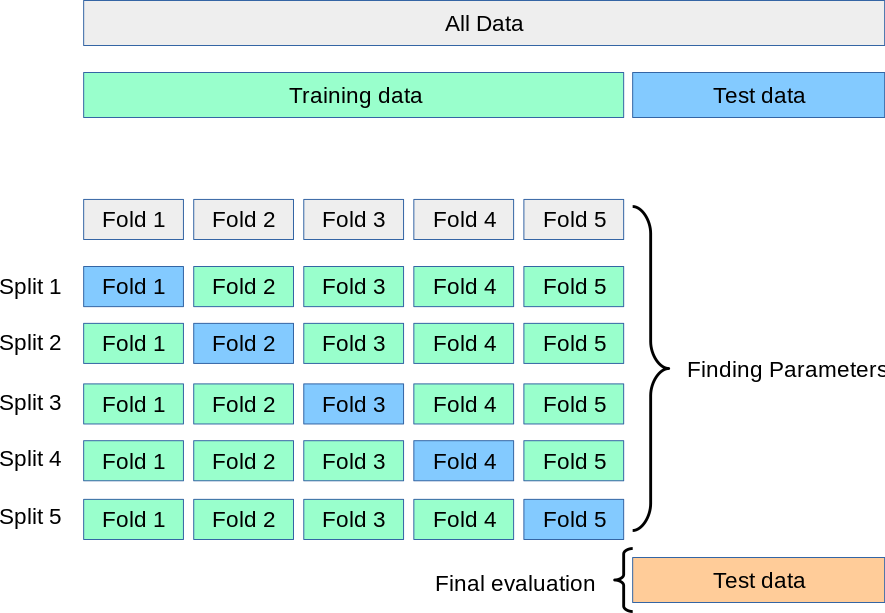

Há diversas métricas para avaliação de modelos de classificação. Eis alguns deles que serão utilizados:

Acurácia: A porcentagem de previsões corretas do modelo.

Precisão: A fração de verdadeiros positivos entre todas as previsões positivas.

Recall: Verdadeiros positivos / (Verdadeiros positivos + Falsos negativos).

Matriz de Confusão: Mostra quantos valores foram classificados corretamente e incorretamente.

In [4]:
def avaliacao(modelo, X_train, y_train, cv = 5):
    #Tipos de Métricas utilizadas
    cv_accuracy_score = cross_val_score(modelo, X_train, y_train, cv=cv, scoring="accuracy")
    cv_precision_score = cross_val_score(modelo, X_train, y_train, cv=cv, scoring="precision")
    cv_recall_score = cross_val_score(modelo, X_train, y_train, cv=cv, scoring="recall")
    #Médias e desvios dos valores
    cv_accuracy_mean_score = cv_accuracy_score.mean()
    cv_accuracy_std_score = cv_accuracy_score.std()
    cv_precision_mean_score = cv_precision_score.mean()
    cv_precision_std_score = cv_precision_score.std()  
    cv_recall_mean_score = cv_recall_score.mean()
    cv_recall_std_score = cv_recall_score.std()
    #Resultados - Range médio de cada uma das métricas
    print(f'Modelo: {modelo}')
    print(f"Acurácia média: {np.round(cv_accuracy_mean_score, 2)} (Intervalo de acurácia: ={'[{:.2f}% ~ {:.2f}%]'.format((cv_accuracy_mean_score - 2*cv_accuracy_std_score)*100, (cv_accuracy_mean_score + 2*cv_accuracy_std_score)*100)})")
    print(f"Precisão média: {np.round(cv_precision_mean_score, 2)} (Intervalo de precisão: ={'[{:.2f}% ~ {:.2f}%]'.format((cv_precision_mean_score - 2*cv_precision_std_score)*100, (cv_precision_mean_score + 2*cv_precision_std_score)*100)})")
    print(f"Recall médio: {np.round(cv_recall_mean_score, 2)} (Intervalo de Recall: ={'[{:.2f}% ~ {:.2f}%]'.format((cv_recall_mean_score - 2*cv_recall_std_score)*100, (cv_recall_mean_score + 2*cv_recall_std_score)*100)})")

### 7.1) Modelo de Regressão Linear

In [21]:
from sklearn.linear_model import LogisticRegression

* Criando o modelo:

In [22]:
reg_v1 = LogisticRegression(max_iter = 1000)

* Treinando o modelo:

In [23]:
reg_v1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

* Pontuação do modelo ou R²:

In [24]:
print(reg_v1.score(X_train,y_train))

0.7657142857142857


* Métricas de Avaliação:

In [82]:
avaliacao(reg_v1, X_train, y_train, cv = 5)

Modelo: LogisticRegression(max_iter=1000)
Acurácia média: 0.72 (Intervalo de acurácia: =[65.82% ~ 78.47%])
Precisão média: 0.55 (Intervalo de precisão: =[43.20% ~ 66.86%])
Recall médio: 0.44 (Intervalo de Recall: =[26.00% ~ 62.88%])


* Coeficientes Angulares do modelo:

In [25]:
reg_v1.coef_

array([[ 2.44344054e-02,  1.52660197e-04,  3.82464572e-01,
        -3.00631007e-02, -2.45256635e-02,  1.84102832e-01,
         3.17430065e-01,  3.09248045e-01,  4.71396373e-01,
        -2.23639462e-01, -1.03797257e+00,  3.18234339e-01,
        -1.05990674e+00,  2.04094612e-01, -2.18028627e-01,
         2.74638797e-01,  5.43164791e-01,  5.65788633e-02,
         7.00135554e-01, -8.91805188e-01, -4.16370366e-01,
         1.30237537e-02, -2.10317596e-01, -1.07792006e-01,
         7.60410615e-02, -2.43626482e-01, -2.60786169e-01,
         3.85468328e-01,  2.19178324e-01, -2.14799229e-01,
        -6.10028868e-01,  1.56037926e-01, -1.13007546e-01,
        -3.72922952e-02, -6.12819522e-01,  1.26113824e-01,
        -1.19641826e-01,  1.25881221e-01,  1.80799434e-01,
        -6.68006443e-01,  4.34077697e-01, -4.55627887e-01,
        -4.59417424e-01, -8.69164204e-02, -1.96207245e-01,
        -4.15334395e-01,  2.17490447e-01, -1.53373904e-01,
        -4.92228773e-01,  1.64635063e-01, -8.84327015e-0

* intercepto ou coeficiente linear do modelo:

In [26]:
reg_v1.intercept_

array([-0.52233226])

* Previsão de dados com o modelo:

In [27]:
y_previsto = reg_v1.predict(X_test)

### 7.1.1) Avaliação do modelo

* Acurácia:

In [66]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_previsto) 
#comparando o valor previsto a partir de x_treino (y_treino) com os de x_teste (y_teste)
acuracia = round(acuracia,2)*100
acuracia

75.0

* Matriz de Confusão:

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

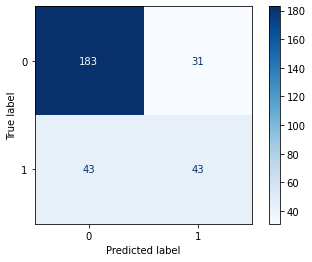

In [30]:
matriz_confusao = plot_confusion_matrix(reg_v1, X_test, y_test, cmap = 'Blues',values_format = '.3g')

A matriz de confusão é uma matriz 2x2 que exibe valores sobre o modelo.

VERDADEIROS POSITIVOS (VP): O primeiro quadrante indica que o modelo RECEBEU dados e PREVEU de acordo com o ESPERADO. Exemplo: Deu uma imagem de cachorro, passou para o classificador do modelo e ele deu como resposta o cachorro.

FALSOS POSITIVOS (FP): O segundo quadrante indica que o modelo RECEBEU dados e PREVEU de forma ERRÔNEA. Exemplo: Ou seja, recebe a imagem de um gato e classifica como cachorro. No nosso modelo: bom pagador virou como um mau pagador.

FALSOS NEGATIVOS (FN): O terceiro quadrante indica que o modelo também recebeu os dados e preveu de forma errada. Exemplo: Recebeu a imagem de um cachorro e classificou como um gato.

VERDADEIROS NEGATIVOS (VN): O quarto quadrante indica que o modelo RECEBEU os dados e PREVEU os dados ERRADOS. Ou seja, recebeu a imagem de um gato e preveu que aquilo NÃO é um cachorro. Ou seja, é como se ele visse um mau pagador e classifica-se como um MAU pagador.

Ou seja, o modelo teve 183+43 previsões corretas, ou seja 226 previsões corretas.

* Classification Report:

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       214
           1       0.58      0.50      0.54        86

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.74      0.75      0.75       300



* Curva ROC e AUC:

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
prob_previsao = reg_v1.predict_proba(X_test)[:,1]

In [35]:
tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print ('roc_auc', roc_auc_score(y_test, prob_previsao))

roc_auc 0.786079113236253


([<matplotlib.lines.Line2D at 0x1997ada04c0>],
 [<matplotlib.lines.Line2D at 0x1997ada06a0>])

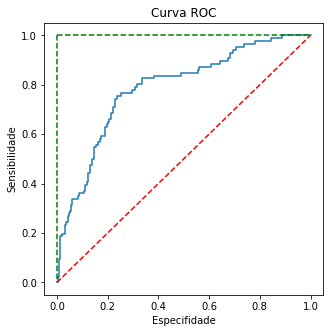

In [36]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot (tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde

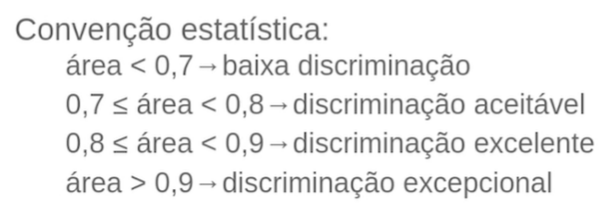

Ou seja, pela curva ROC podemos ver que o nosso modelo teve um valor de 0.78 na AUC mostrando que ele discrimina os dados de uma forma aceitável. Porém há melhores formas de modelagem para que o modelo possa ter uma pontuação AUC muito maior e uma acurácia melhor para que a discriminação seja melhor

### 7.1.2) Aperfeiçoando o modelo

Podemos medir as features mais importantes pelo valor dos coeficientes, pelo p-valor ou por redução de dimensionalidade PCA. No caso irei testar pelos coeficientes e avaliar se o mesmo será eficientes para me mostrar as features mais importantes para o modelo de Regressão Logística que eu criei:

In [37]:
# Obter os coeficientes e orderná-los em ordem decrescente
coef = reg_v1.coef_[0]
sorted_idx = np.argsort(coef)[::-1]

# Exibir as features em ordem decrescente de importância
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {coef[i]}")

proposito_emprestimo_car (new): 0.7001355540820845
proposito_emprestimo_(vacation - does not exist?): 0.5431647910063027
conta_corrente_< 0 DM: 0.4713963730305853
outros_fiadores_co-applicant: 0.434077697266665
reserva_cc_... < 100 DM: 0.3854683277262672
taxa_comp_salario: 0.3824645715706017
historico_credito_all credits at this bank paid back duly: 0.3182343388397137
n_dependentes: 0.3174300653279373
conta_corrente_0 <= ... < 200 DM: 0.3092480449887999
historico_credito_no credits taken/ all credits paid back duly: 0.27463879712645856
reserva_cc_100 <= ... < 500 DM: 0.21917832411784657
propriedade_unknown / no property: 0.21749044675058082
historico_credito_delay in paying off in the past: 0.20409461231068504
n_creditos_banco: 0.1841028323717188
sexo_est_civil_male : married/widowed: 0.1807994340612379
outros_planos_financiamento_stores: 0.16463506270712125
tempo_emprego_atual_.. >= 7 years: 0.15603792562759008
tempo_emprego_atual_unemployed: 0.12611382386288802
sexo_est_civil_male : 

O problema é que quando realizei o One Hot Encoding ele criou várias colunas a partir de uma coluna de origem. Não posso considerar por exemplo que a coluna "proposito_emprestimo_car (new)" é mais importante que a "proposito_emprestimo_retraining" uma vez que ambas se originaram da coluna "proposito_emprestimo_retraining". Então neste caso vou testar rodar o modelo com as colunas originais e avaliar a importância das features

#### Refazendo agora o modelo mas sem a Feature Engineering por One Hot Encoding

In [5]:
dados = df.copy()

In [6]:
#mudando categoria variavel 'conta_corrente'

a = {'< 0 DM':0, 
     '0 <= ... < 200 DM':1,
     'no checking account':2,
     '>= 200 DM / salary assignments for at least 1 year':3
}

dados['conta_corrente'] = dados['conta_corrente'].map(a)

#mudando categoria variavel 'historico_credito'

b = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
dados['historico_credito'] = dados['historico_credito'].map(b)

#mudando categoria variavel 'reserva_cc'

c = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
dados['reserva_cc'] = dados['reserva_cc'].map(c)

#mudando categoria variavel 'tempo_emprego_atual'

d = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(d)

#mudando categoria variavel 'sexo_est_civil'

e = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(e)

#mudando categoria variavel 'outros_fiadores'

f = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(f)

#mudando categoria variavel 'propriedade'

h = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
dados['propriedade'] = dados['propriedade'].map(h)

#mudando categoria variavel 'outros_planos_financiamento'

i = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(i)

#mudando categoria variavel 'tipo_residencia'

j = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(j)

#mudando categoria variavel 'status_emprego'

k = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dados['status_emprego'] = dados['status_emprego'].map(k)

#mudando categoria variavel 'telefone'

l = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dados['telefone'] = dados['telefone'].map(l)

#mudando categoria variavel 'trabalhador_estrangeiro'

m = { 'yes' : 1,
      'no' : 0
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(m)

#mudando categoria variavel 'proposito_emprestimo'

n = {'domestic appliances' : 1,
    '(vacation - does not exist?)' : 2,
     'radio/television':3,
     'car (new)':4,
     'car (used)':5,
     'business':6,
     'repairs':7,
     'education':8,
     'furniture/equipment':9,
     'retraining':10
    
     
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(n)

In [7]:
#Mudando a variável sexo e estado civil

dic_sexo = {2:1,5:1,1:0,3:0,4:0}
dic_est_civil = {3:1,5:1,1:0,2:0,4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,0,6,5,1,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1,0,1
1,1,1,48,3,1,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1,1,0
2,0,2,12,5,2,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1,0,1
3,0,0,42,3,3,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1,0,1
4,1,0,24,4,4,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1,0,1


* Separando os dados:

In [41]:
X_new = dados.drop(columns = 'default')
y_new = dados['default']

In [42]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=77)

* Criando o modelo:

In [43]:
from sklearn.linear_model import LogisticRegression
reg_v2 = LogisticRegression(max_iter = 1000)

* Treinando o modelo:

In [44]:
reg_v2.fit(X_train_new,y_train_new)

LogisticRegression(max_iter=1000)

* Pontuação do modelo (R²):

In [45]:
print(reg_v2.score(X_train_new,y_train_new))

0.7328571428571429


* Métricas:

In [83]:
avaliacao(reg_v2, X_train_new, y_train_new, cv = 5)

Modelo: LogisticRegression(max_iter=1000)
Acurácia média: 0.73 (Intervalo de acurácia: =[67.14% ~ 78.57%])
Precisão média: 0.57 (Intervalo de precisão: =[46.80% ~ 67.99%])
Recall médio: 0.42 (Intervalo de Recall: =[27.34% ~ 56.87%])


* Previsão do modelo:

In [46]:
y_previsto_new = reg_v2.predict(X_test_new)

* Acurácia do modelo:

In [76]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test_new, y_previsto_new) 
acuracia = round(acuracia,2)*100
acuracia

81.0

* Matriz de confusão:

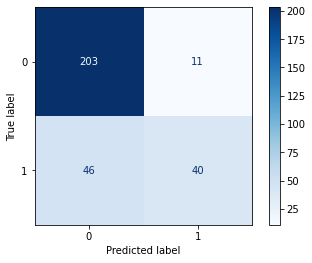

In [48]:
from sklearn.metrics import plot_confusion_matrix
matriz_confusao_new = plot_confusion_matrix(reg_v2, X_test_new, y_test_new, cmap = 'Blues',values_format = '.3g')

* Curva ROC e AUC:

In [49]:
prob_previsao_new = reg_v2.predict_proba(X_test_new)[:,1]

In [50]:
tfp_2, tvp_2, limite_2 = roc_curve(y_test_new, prob_previsao_new)
print ('AUC:', roc_auc_score(y_test_new, prob_previsao_new))

AUC: 0.8074331667028907


([<matplotlib.lines.Line2D at 0x1997aec5dc0>],
 [<matplotlib.lines.Line2D at 0x1997aed3190>])

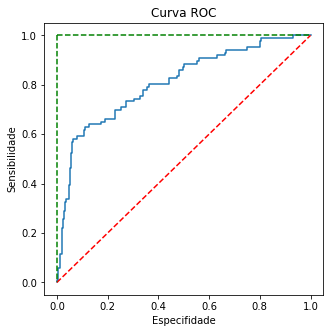

In [51]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot (tfp_2,tvp_2)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde

* Feature Importances:

In [52]:
# Obter os coeficientes e orderná-los em ordem decrescente
coef_new = reg_v2.coef_[0]
sorted_idx = np.argsort(coef_new)[::-1]

# Exibir as features em ordem decrescente de importância
for i in sorted_idx:
    print(f"{X_train_new.columns[i]}: {coef_new[i]}")

taxa_comp_salario: 0.2819874658546894
n_creditos_banco: 0.2450451557957038
reserva_cc: 0.22212359348905764
propriedade: 0.18553539832427796
n_dependentes: 0.12666819316951924
tempo_emprego_atual: 0.05171883401376396
trabalhador_estrangeiro: 0.02639808344467373
prazo_emprestimo_meses: 0.023036919031482406
proposito_emprestimo: 0.004668478973177817
valor_emprestimo: 0.00012284177630717498
idade: -0.011951780386332805
status_emprego: -0.04291171817417037
sexo: -0.04866884748609291
anos_residencia_atual: -0.09546747604721284
outros_fiadores: -0.1268895432185305
tipo_residencia: -0.14371248671172648
sexo_est_civil: -0.17540271468474933
telefone: -0.17585334208974057
outros_planos_financiamento: -0.2880528377241621
historico_credito: -0.29768087746951233
estado_civil: -0.32740066622699326
conta_corrente: -0.6717319673839655


* Função automatizada:

Agora vou utilizar uma função que realiza todos os comandos da criação do modelo, desde a separação até a medição da acurácia. Basta passar a nova base de dados alterada e o modelo

In [8]:
#Definindo a função, que recebe a base de dados e o classificador

def modelo_classificador(df_novo,classificador):
    y = df_novo['default'] #definindo a coluna do y
    X = df_novo.drop(columns = 'default') #definindo as colunas do x
    
    #1) Separando em treino e teste
    SEED = 77
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
    base_treino = X_train.shape[0]
    base_teste = X_test.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))
    print(100*'-')
    
    #2) Criando o modelo
    modelo = classificador
    modelo.fit(X_train,y_train)
    
    #3) Matriz Confusão
    matriz_confusao = plot_confusion_matrix(modelo, X_test, y_test, values_format = '3g', cmap = 'Blues')
    plt.title('Matriz de Confusão')
    plt.show
    
    #4) Acurácia, Classification Report e Métricas
    y_predict = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_predict) 
    acuracia = round(acuracia,2)*100
    print(100*'-')
    avaliacao(modelo, X_train, y_train, cv = 5)
    print(100*'-')
    print('Acurácia:',acuracia)
    print(100*'-')
    print('Classification Report:')
    print(classification_report(y_test,y_predict))

    
    #5) Curva ROC e AUC
    print(100*'-')
    prob_previsao = modelo.predict_proba(X_test)[:,1]
    tfp,tvp,limite = roc_curve(y_test,prob_previsao)
    print('roc_auc:',roc_auc_score(y_test, prob_previsao))
    print(100*'-')
    

    plt.figure(figsize = (5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()
    
    
    return modelo,matriz_confusao,acuracia

* Testando a funcionalidade da função:

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: LogisticRegression(max_iter=1000)
Acurácia média: 0.73 (Intervalo de acurácia: =[67.14% ~ 78.57%])
Precisão média: 0.57 (Intervalo de precisão: =[46.80% ~ 67.99%])
Recall médio: 0.42 (Intervalo de Recall: =[27.34% ~ 56.87%])
----------------------------------------------------------------------------------------------------
Acurácia: 81.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       214
           1       0.78      0.47      0.58        86

    accuracy                           0.81       300
   macro avg       0.80      0.71  

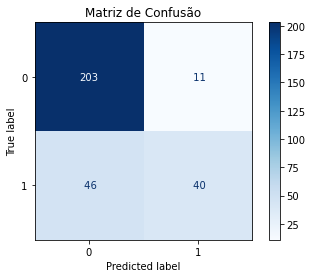

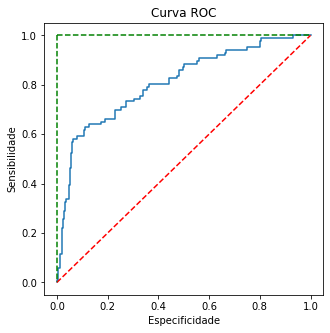

(LogisticRegression(max_iter=1000),
 81.0)

In [96]:
modelo_classificador(dados,LogisticRegression(max_iter = 1000))

Ok! Os resultados foram os mesmos, então a função está apta a ser utilizada

* Feature Importances pelo Statsmodel:

In [55]:
import statsmodels.api as sm

In [56]:
X_train_const = sm.add_constant(X_train_new)

In [57]:
resultado_regressao = sm.Logit(y_train_new, X_train_new).fit()

Optimization terminated successfully.
         Current function value: 0.498083
         Iterations 6


In [58]:
print(resultado_regressao.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                           21
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.1909
Time:                        13:47:54   Log-Likelihood:                -348.66
converged:                       True   LL-Null:                       -430.94
Covariance Type:            nonrobust   LLR p-value:                 2.878e-24
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
conta_corrente                 -0.6562      0.111     -5.937      0.000      -0.873      -0.440
prazo_emprestimo_meses          0.0205      0.010      2.100      0.036       0.

#### P-Value: 

O p-valor associado a cada coeficiente indica a significância estatística da relação entre a feature e a variável dependente. Valores p pequenos (<0,05) indicam uma relação estatisticamente significativa. No entanto, é importante lembrar que a significância estatística não é o mesmo que importância prática ou preditiva.

* Executando a função com o novo dataset com as principais Features:

In [9]:
colunas_retiradas = ['prazo_emprestimo_meses', 'proposito_emprestimo','tempo_emprego_atual','sexo_est_civil',
                     'outros_fiadores','anos_residencia_atual','propriedade','idade','tipo_residencia','n_creditos_banco',
                     'status_emprego','n_dependentes','telefone','trabalhador_estrangeiro','sexo']
df_novo = dados.drop(columns = colunas_retiradas)
df_novo.head()

,default,conta_corrente,historico_credito,valor_emprestimo,reserva_cc,taxa_comp_salario,outros_planos_financiamento,estado_civil
0,0,0,5,1169,1,4,3,1
1,1,1,3,5951,5,2,3,0
2,0,2,5,2096,5,2,3,1
3,0,0,3,7882,5,2,3,1
4,1,0,4,4870,5,3,3,1


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: LogisticRegression(max_iter=1000)
Acurácia média: 0.74 (Intervalo de acurácia: =[69.70% ~ 79.16%])
Precisão média: 0.62 (Intervalo de precisão: =[51.01% ~ 73.95%])
Recall médio: 0.41 (Intervalo de Recall: =[27.88% ~ 54.45%])
----------------------------------------------------------------------------------------------------
Acurácia: 79.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       214
           1       0.73      0.43      0.54        86

    accuracy                           0.79       300
   macro avg       0.76      0.68  

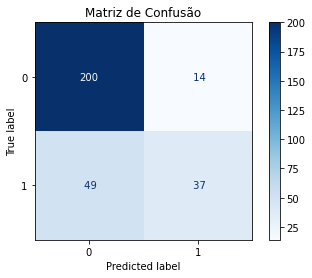

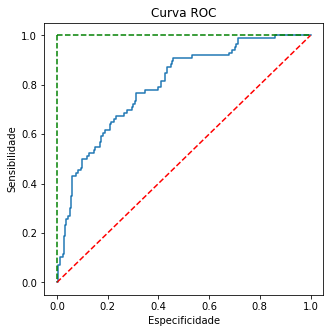

(LogisticRegression(max_iter=1000),
 79.0)

In [97]:
modelo_classificador(df_novo,LogisticRegression(max_iter = 1000))

## Conclusão:

Cada modelo terá uma acurácia e uma AUC diferente do outro e o ideal não é ficar preso apenas à métricas e indicadores, e pensar no case de negócios. O objetivo é saber se devemos ou não conceder crédito à alguma pessoa, e cada banco terá um perfil, seja ele conservador ou não, então nosso modelo não pode errar muito as previsões. 

Ainda que um modelo tenha uma acurácia menor que o outro, isso não significa que ele seja necessariamente pior. O objetivo é evitar ao máximo a concessão de crédito para pessoas arriscadas. É claro que o modelo não é perfeito e vai deixar de conceder crédito para pessoas que "mereciam", porém o mais importante é o modelo errar o menos possível na concessão de crédito para pessoas com alto risco.

Se o modelo previu o cliente como 0 (Sem risco) quando na verdade ele é 1 (Arriscado), então o modelo concedeu crédito para uma pessoa arriscada, e esse é o erro crucial que o modelo deve evitar. Então esse é o principal indicador que irei visualizar, além da AUC e da Acurácia.

A priori ao refazer o dataset sem fazer a Feature Engineering com One Hot Encoding, e modificando os valores do tipo categóricos, um a um, o dataset respondeu bem ao ser treinado pelo modelo de regressão logística obtendo-se uma acurácia de 81%. O segundo modelo com uma menor quantidade de features obteve uma acurária de 79%, ligeiramente menor, porém o mesmo possuindo menos features fica mais fácil de ser executado e realizar deploy futuramente ao inserir novos dados. O primeiro modelo concedeu crédito de forma errônea para 46 pessoas, enquanto o segundo para 49. Não foi uma diferença crucial, mas ainda sim o modelo 2 será o escolhido por conta da facilidade em realizar deploy

## 7.2) DecisionTree

A ideia agora é testar o modelo de DecisionTree e modificar seus hiperparâmetros no dataset em que não foi realizado One Hot Encoding para testar suas métricas

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.tree import export_text
warnings.filterwarnings("ignore")
%matplotlib inline

### 7.2.1) Testando modelos

* Criando uma função automatizada para criação de modelos de DecisionTree:

In [125]:
#Definindo a função, que recebe a base de dados e o classificador

def modelo_classificador_arvore(df_novo,classificador):
    y = df_novo['default'] #definindo a coluna do y
    X = df_novo.drop(columns = 'default') #definindo as colunas do x
    
    #1) Separando em treino e teste
    SEED = 77
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
    base_treino = X_train.shape[0]
    base_teste = X_test.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))
    print(100*'-')
    
    #2) Criando o modelo
    modelo = classificador
    modelo.fit(X_train,y_train)
    
    #3) Matriz Confusão
    matriz_confusao = plot_confusion_matrix(modelo, X_test, y_test, values_format = '3g', cmap = 'Blues')
    plt.title('Matriz de Confusão')
    plt.show
    
    #4) Acurácia, Classification Report e Métricas
    y_predict = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_predict) 
    acuracia = round(acuracia,2)*100
    print(100*'-')
    avaliacao(modelo, X_train, y_train, cv = 5)
    print(100*'-')
    print('Acurácia:',acuracia)
    print(100*'-')
    print('Classification Report:')
    print(classification_report(y_test,y_predict))

    
    #5) Curva ROC e AUC
    print(100*'-')
    prob_previsao = modelo.predict_proba(X_test)[:,1]
    tfp,tvp,limite = roc_curve(y_test,prob_previsao)
    print('roc_auc:',roc_auc_score(y_test, prob_previsao))
    print(100*'-')
    

    plt.figure(figsize = (5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()
    
    #6) Feature Importances:
    print(100*'-')
    #criando um dicionário com as variáveis
    dic = {'score':modelo.feature_importances_,'features':X_train.columns}
    #criando um dataframe com os dados
    FI = pd.DataFrame(dic).sort_values('score',ascending=False)
    FI
    
    fig, ax = plt.subplots()

    ax.barh(FI['features'], FI['score'], align='center')
    ax.invert_yaxis()  # labels lidos de cima para baixo
    ax.set_xlabel('Score')
    ax.set_ylabel('Features do Modelo')
    ax.set_title('Score de Cada Feature do Modelo de DecisionTree')
    
    plt.show()

    
    return modelo,matriz_confusao,acuracia,FI

### * DecisionTree_v1:

Modelo mais básico de DecisionTree, com todos os hiperparâmetros no default:

In [193]:
clf_v1 = DecisionTreeClassifier() 

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: DecisionTreeClassifier()
Acurácia média: 0.66 (Intervalo de acurácia: =[60.69% ~ 71.31%])
Precisão média: 0.45 (Intervalo de precisão: =[38.72% ~ 51.13%])
Recall médio: 0.46 (Intervalo de Recall: =[34.27% ~ 57.36%])
----------------------------------------------------------------------------------------------------
Acurácia: 70.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       214
           1       0.48      0.49      0.48        86

    accuracy                           0.70       300
   macro avg       0.63      0.64      0.64 

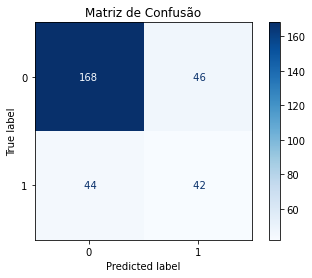

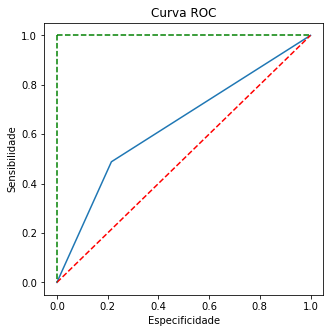

----------------------------------------------------------------------------------------------------


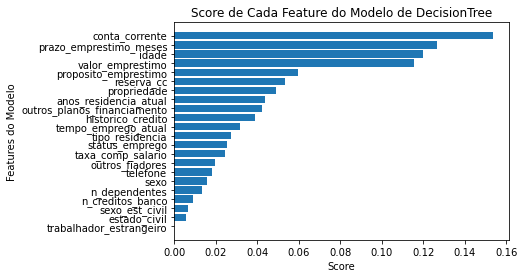

(DecisionTreeClassifier(),
 70.0,
        score                     features
 0   0.153680               conta_corrente
 1   0.126477       prazo_emprestimo_meses
 12  0.119785                        idade
 4   0.115524             valor_emprestimo
 3   0.059613         proposito_emprestimo
 5   0.053556                   reserva_cc
 11  0.048941                  propriedade
 10  0.043915        anos_residencia_atual
 13  0.042300  outros_planos_financiamento
 2   0.039102            historico_credito
 6   0.031483          tempo_emprego_atual
 14  0.027466              tipo_residencia
 16  0.025499               status_emprego
 7   0.024518            taxa_comp_salario
 9   0.019520              outros_fiadores
 18  0.018092                     telefone
 20  0.015707                         sexo
 17  0.013448                n_dependentes
 15  0.009079             n_creditos_banco
 8   0.006688               sexo_est_civil
 21  0.005609                 estado_civil
 19  0.000000      t

In [194]:
modelo_classificador_arvore(dados,clf_v1)

Observamos uma acurácia muito baixa e o valor da AUC está abaixo do necessário para discriminar os valores.

### * DecisionTree_v2:

Modelo utilizando o critério de Entropia e mínimo de 15 amostras por folha

In [195]:
clf_v2 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=15)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=15)
Acurácia média: 0.7 (Intervalo de acurácia: =[65.61% ~ 73.82%])
Precisão média: 0.51 (Intervalo de precisão: =[42.17% ~ 59.44%])
Recall médio: 0.37 (Intervalo de Recall: =[22.84% ~ 51.03%])
----------------------------------------------------------------------------------------------------
Acurácia: 75.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       214
           1       0.57      0.48      0.52        86

    accuracy                           0.75       300
   ma

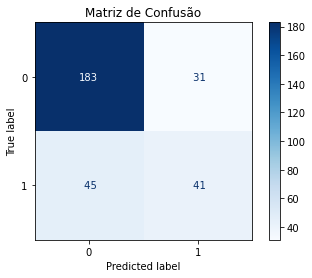

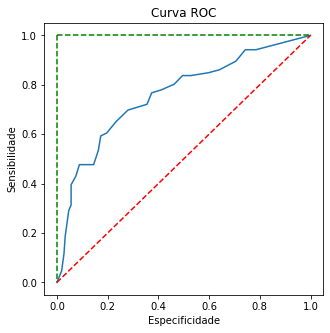

----------------------------------------------------------------------------------------------------


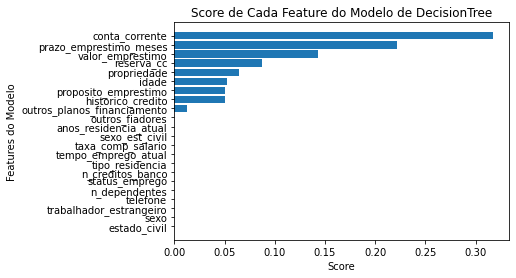

(DecisionTreeClassifier(criterion='entropy', min_samples_leaf=15),
 75.0,
        score                     features
 0   0.317542               conta_corrente
 1   0.221914       prazo_emprestimo_meses
 4   0.142587             valor_emprestimo
 5   0.086880                   reserva_cc
 11  0.064287                  propriedade
 12  0.052739                        idade
 3   0.050857         proposito_emprestimo
 2   0.050789            historico_credito
 13  0.012404  outros_planos_financiamento
 9   0.000000              outros_fiadores
 10  0.000000        anos_residencia_atual
 8   0.000000               sexo_est_civil
 7   0.000000            taxa_comp_salario
 6   0.000000          tempo_emprego_atual
 14  0.000000              tipo_residencia
 15  0.000000             n_creditos_banco
 16  0.000000               status_emprego
 17  0.000000                n_dependentes
 18  0.000000                     telefone
 19  0.000000      trabalhador_estrangeiro
 20  0.000000          

In [196]:
modelo_classificador_arvore(dados,clf_v2)

O modelo já demonstra as features mais importantes, pontuando como ZERO as que não foram úteis para a discriminação das classes e ainda obteve uma AUC maior que o primeiro. Ainda dá para deixar o modelo mais robusto visando encontrar os melhores hiperparâmetros

### 7.2.2) Encontrando Hiperparâmetros

* RandomizedSearchVC

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
param_dist = {
              "max_depth": [1, 3, 12],
              "max_features": [1, 8, 10, 12],
              "min_samples_split": [8, 10, 11, 19],
              "min_samples_leaf": [1, 2],
              "criterion" : ['gini','entropy']
             }

In [217]:
rsearch = RandomizedSearchCV(clf_v2, 
                             param_distributions = param_dist, 
                             n_iter = 8, #poucas iterações se não fica pesado
                             return_train_score = True
                            )  

In [218]:
y = dados['default'] #definindo a coluna do y
X = dados.drop(columns = 'default') #definindo as colunas do x

In [219]:
SEED = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [220]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    min_samples_leaf=15),
                   n_iter=8,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 12],
                                        'max_features': [1, 8, 10, 12],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [8, 10, 11, 19]},
                   return_train_score=True)

In [221]:
# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)

DecisionTreeClassifier(max_depth=12, max_features=12, min_samples_leaf=2,
                       min_samples_split=19)


In [223]:
clf_v3 = DecisionTreeClassifier(criterion="entropy",max_depth=12, max_features=12,min_samples_split=19,min_samples_leaf=2)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=12,
                       min_samples_leaf=2, min_samples_split=19)
Acurácia média: 0.69 (Intervalo de acurácia: =[64.00% ~ 74.29%])
Precisão média: 0.44 (Intervalo de precisão: =[27.13% ~ 60.93%])
Recall médio: 0.43 (Intervalo de Recall: =[22.40% ~ 63.69%])
----------------------------------------------------------------------------------------------------
Acurácia: 73.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       214
           1       0.56      0.35     

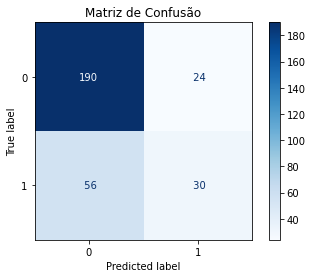

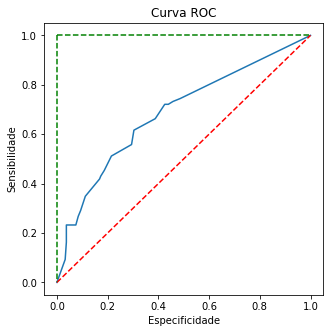

----------------------------------------------------------------------------------------------------


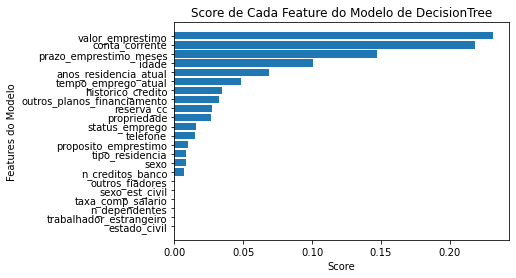

(DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=12,
                        min_samples_leaf=2, min_samples_split=19),
 73.0,
        score                     features
 4   0.231465             valor_emprestimo
 0   0.217948               conta_corrente
 1   0.146939       prazo_emprestimo_meses
 12  0.100510                        idade
 10  0.068565        anos_residencia_atual
 6   0.048726          tempo_emprego_atual
 2   0.034879            historico_credito
 13  0.032370  outros_planos_financiamento
 5   0.027599                   reserva_cc
 11  0.026554                  propriedade
 16  0.015706               status_emprego
 18  0.015213                     telefone
 3   0.009789         proposito_emprestimo
 14  0.008547              tipo_residencia
 20  0.008225                         sexo
 15  0.006964             n_creditos_banco
 9   0.000000              outros_fiadores
 8   0.000000               sexo_est_civil
 7   0.000000            taxa_com

In [224]:
modelo_classificador_arvore(dados,clf_v3)

* GridSearchCV:

In [176]:
from sklearn.model_selection import GridSearchCV

In [211]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"]}

In [212]:
grid_search = GridSearchCV(clf_v1, param_grid = param_grid, return_train_score = True)

In [213]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10]},
             return_train_score=True)

In [214]:
# Imprimindo o melhor estimador
bestclf_GS = grid_search.best_estimator_
print (bestclf_GS)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                       min_samples_leaf=10)


In [215]:
clf_v4 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10,max_depth=3, max_features=10)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                       min_samples_leaf=10)
Acurácia média: 0.7 (Intervalo de acurácia: =[63.73% ~ 76.56%])
Precisão média: 0.52 (Intervalo de precisão: =[32.15% ~ 71.81%])
Recall médio: 0.2 (Intervalo de Recall: =[-6.19% ~ 45.62%])
----------------------------------------------------------------------------------------------------
Acurácia: 71.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       214
           1       0.48      0.14      0.22        86

    acc

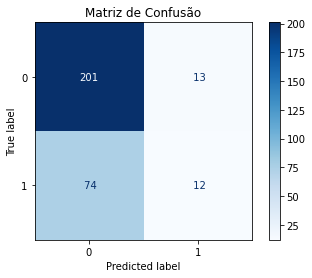

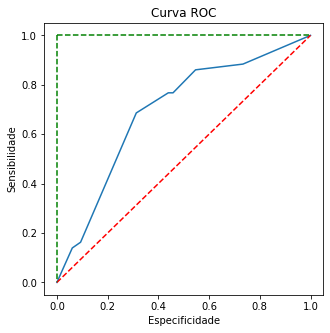

----------------------------------------------------------------------------------------------------


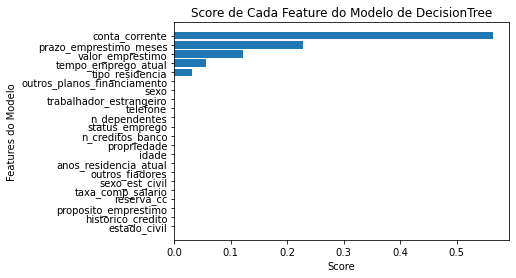

(DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        min_samples_leaf=10),
 71.0,
        score                     features
 0   0.564872               conta_corrente
 1   0.227640       prazo_emprestimo_meses
 4   0.121074             valor_emprestimo
 6   0.055479          tempo_emprego_atual
 14  0.030935              tipo_residencia
 13  0.000000  outros_planos_financiamento
 20  0.000000                         sexo
 19  0.000000      trabalhador_estrangeiro
 18  0.000000                     telefone
 17  0.000000                n_dependentes
 16  0.000000               status_emprego
 15  0.000000             n_creditos_banco
 11  0.000000                  propriedade
 12  0.000000                        idade
 10  0.000000        anos_residencia_atual
 9   0.000000              outros_fiadores
 8   0.000000               sexo_est_civil
 7   0.000000            taxa_comp_salario
 5   0.000000                   reserva_cc
 3   0.00000

In [216]:
modelo_classificador_arvore(dados,clf_v4)

O melhor modelo até o momento foi o clf_v2 (criterion="entropy", min_samples_leaf=15) que obteve uma acurácia 75% e AUC de 0.76

Outro modo é testar outros modelos relacionados à DecisionTree (Ensembles) como RandomForest, ExtraTrees e testar os hiperparâmetros

## 7.3) RandomForest

In [225]:
from sklearn.ensemble import RandomForestClassifier

### * RandomForest_v1

Modelo simples de RandomForest com todos os parâmetros no default e utilizando 50 árvores de decisão

In [226]:
rf_v1 = RandomForestClassifier(50)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier(n_estimators=50)
Acurácia média: 0.75 (Intervalo de acurácia: =[73.25% ~ 77.04%])
Precisão média: 0.63 (Intervalo de precisão: =[46.76% ~ 79.28%])
Recall médio: 0.35 (Intervalo de Recall: =[25.83% ~ 44.32%])
----------------------------------------------------------------------------------------------------
Acurácia: 78.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       214
           1       0.73      0.35      0.47        86

    accuracy                           0.78       300
   macro avg       0.76      

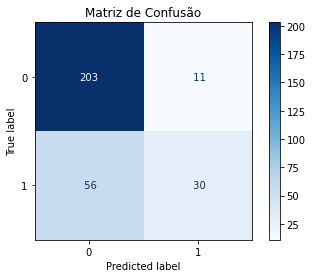

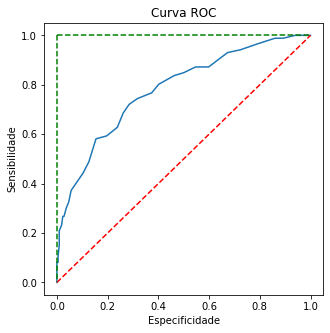

----------------------------------------------------------------------------------------------------


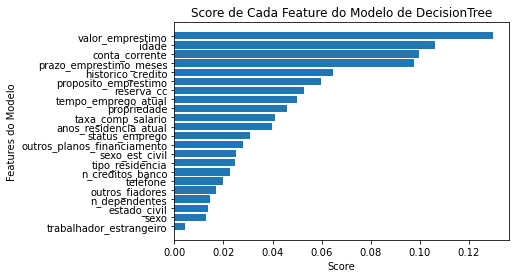

(RandomForestClassifier(n_estimators=50),
 78.0,
        score                     features
 4   0.129847             valor_emprestimo
 12  0.106228                        idade
 0   0.099716               conta_corrente
 1   0.097615       prazo_emprestimo_meses
 2   0.064820            historico_credito
 3   0.059605         proposito_emprestimo
 5   0.052678                   reserva_cc
 6   0.049974          tempo_emprego_atual
 11  0.045709                  propriedade
 7   0.041142            taxa_comp_salario
 10  0.039834        anos_residencia_atual
 16  0.030698               status_emprego
 13  0.027800  outros_planos_financiamento
 8   0.025171               sexo_est_civil
 14  0.024679              tipo_residencia
 15  0.022496             n_creditos_banco
 18  0.019732                     telefone
 9   0.017126              outros_fiadores
 17  0.014428                n_dependentes
 21  0.013601                 estado_civil
 20  0.012954                         sexo
 19  

In [232]:
modelo_classificador_arvore(dados,rf_v1)

Só com esse modelo simples já temos uma acurácia e uma AUC maior que as decision trees anteriores, porém ainda é possível melhorar o modelo com os hiperparâmetros corretos

### * RandomForest_v2

Utilizando agora 50 árvores e o método entropia de critério

In [234]:
rf_v2 = RandomForestClassifier(n_estimators = 50,
                               criterion = 'entropy',
                              )

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier(criterion='entropy', n_estimators=50)
Acurácia média: 0.74 (Intervalo de acurácia: =[69.29% ~ 79.57%])
Precisão média: 0.67 (Intervalo de precisão: =[57.10% ~ 76.45%])
Recall médio: 0.38 (Intervalo de Recall: =[29.86% ~ 45.84%])
----------------------------------------------------------------------------------------------------
Acurácia: 79.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       214
           1       0.74      0.40      0.52        86

    accuracy                           0.79       300
   macro

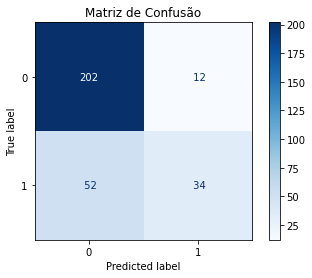

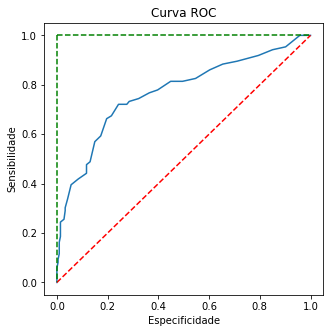

----------------------------------------------------------------------------------------------------


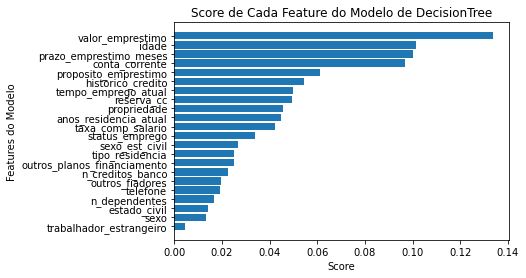

(RandomForestClassifier(criterion='entropy', n_estimators=50),
 79.0,
        score                     features
 4   0.133778             valor_emprestimo
 12  0.101251                        idade
 1   0.100034       prazo_emprestimo_meses
 0   0.096968               conta_corrente
 3   0.061158         proposito_emprestimo
 2   0.054338            historico_credito
 6   0.049759          tempo_emprego_atual
 5   0.049509                   reserva_cc
 11  0.045733                  propriedade
 10  0.044941        anos_residencia_atual
 7   0.042073            taxa_comp_salario
 16  0.033990               status_emprego
 8   0.026806               sexo_est_civil
 14  0.025145              tipo_residencia
 13  0.024971  outros_planos_financiamento
 15  0.022424             n_creditos_banco
 9   0.019662              outros_fiadores
 18  0.019074                     telefone
 17  0.016635                n_dependentes
 21  0.014082                 estado_civil
 20  0.013222              

In [235]:
modelo_classificador_arvore(dados,rf_v2)

RandomSearchCV

In [238]:
param_dist = {
              "max_depth": [1, 5, 12],
              "max_features": [1, 8, 10, None],
              "min_samples_split": [2, 8, 10, 19],
              "min_samples_leaf": [1, 2]
             }

In [246]:
rsearch = RandomizedSearchCV(rf_v2, 
                             param_distributions = param_dist, 
                             n_iter = 8, #poucas iterações se não fica pesado
                             return_train_score = True
                            )  

In [29]:
y = dados['default'] #definindo a coluna do y
X = dados.drop(columns = 'default') #definindo as colunas do x

In [30]:
SEED = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [249]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=50),
                   n_iter=8,
                   param_distributions={'max_depth': [1, 5, 12],
                                        'max_features': [1, 8, 10, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 8, 10, 19]},
                   return_train_score=True)

In [250]:
# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=50)


In [251]:
rf_v3 = RandomForestClassifier(
                               criterion='entropy',
                               max_depth=12,
                               n_estimators = 50,
                               max_features=None,
                               min_samples_split=8,
                               min_samples_leaf=2
                              )

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=50)
Acurácia média: 0.74 (Intervalo de acurácia: =[67.45% ~ 80.55%])
Precisão média: 0.57 (Intervalo de precisão: =[50.08% ~ 64.52%])
Recall médio: 0.46 (Intervalo de Recall: =[31.13% ~ 60.52%])
----------------------------------------------------------------------------------------------------
Acurácia: 77.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       2

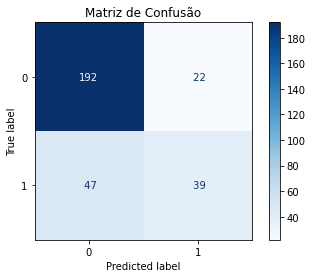

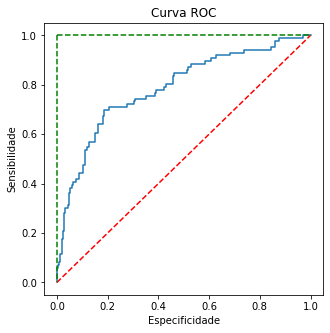

----------------------------------------------------------------------------------------------------


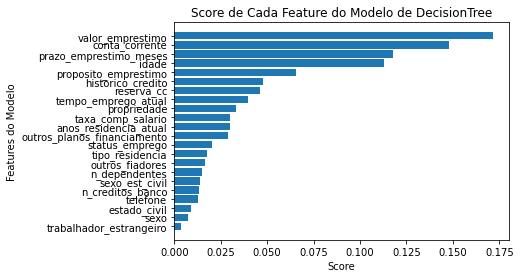

(RandomForestClassifier(criterion='entropy', max_depth=12, max_features=None,
                        min_samples_leaf=2, min_samples_split=8,
                        n_estimators=50),
 77.0,
        score                     features
 4   0.171692             valor_emprestimo
 0   0.147683               conta_corrente
 1   0.117736       prazo_emprestimo_meses
 12  0.112999                        idade
 3   0.065458         proposito_emprestimo
 2   0.047673            historico_credito
 5   0.046312                   reserva_cc
 6   0.039887          tempo_emprego_atual
 11  0.032946                  propriedade
 7   0.030136            taxa_comp_salario
 10  0.029826        anos_residencia_atual
 13  0.028799  outros_planos_financiamento
 16  0.020504               status_emprego
 14  0.017664              tipo_residencia
 9   0.016303              outros_fiadores
 17  0.014796                n_dependentes
 8   0.013977               sexo_est_civil
 15  0.013161             n_credit

In [252]:
modelo_classificador_arvore(dados,rf_v3)

* GridSearchCV:

In [253]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "min_samples_split": [2, 8, 10, 19]
             }

In [254]:
grid_search = GridSearchCV(rf_v2, param_grid = param_grid, return_train_score = True)

In [255]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=50),
             param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 8, 10, 19]},
             return_train_score=True)

In [256]:
# Imprimindo o melhor estimador
bestclf_GS = grid_search.best_estimator_
print (bestclf_GS)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=50)


In [257]:
rf_v4 = RandomForestClassifier(
                               criterion='entropy',
                               n_estimators = 50,
                               max_features=3
                              )

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=50)
Acurácia média: 0.74 (Intervalo de acurácia: =[71.03% ~ 77.54%])
Precisão média: 0.62 (Intervalo de precisão: =[50.44% ~ 73.85%])
Recall médio: 0.33 (Intervalo de Recall: =[23.53% ~ 41.88%])
----------------------------------------------------------------------------------------------------
Acurácia: 78.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       214
           1       0.74      0.37      0.50        86

    accuracy                           0.78   

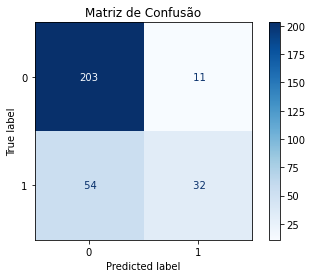

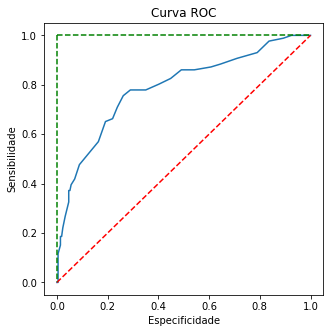

----------------------------------------------------------------------------------------------------


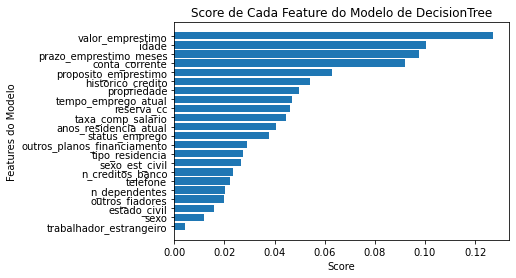

(RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=50),
 78.0,
        score                     features
 4   0.127182             valor_emprestimo
 12  0.100522                        idade
 1   0.097475       prazo_emprestimo_meses
 0   0.091913               conta_corrente
 3   0.062736         proposito_emprestimo
 2   0.054081            historico_credito
 11  0.049652                  propriedade
 6   0.046793          tempo_emprego_atual
 5   0.046104                   reserva_cc
 7   0.044597            taxa_comp_salario
 10  0.040658        anos_residencia_atual
 16  0.037791               status_emprego
 13  0.029022  outros_planos_financiamento
 14  0.027544              tipo_residencia
 8   0.026516               sexo_est_civil
 15  0.023455             n_creditos_banco
 18  0.022023                     telefone
 17  0.020043                n_dependentes
 9   0.019809              outros_fiadores
 21  0.015925                 estado_civil
 20  0.0117

In [258]:
modelo_classificador_arvore(dados,rf_v4)

Nesse caso o modelo rf_3 foi o melhor tendo uma acurácia média de 77, uma AUC de aproximadamente 0.79 e concedeu de forma errada crédito apenas para 47 pessoas. Outros modelos até tiveram uma acurácia ligeiramente maior, porém o número de pessoas concedidas de forma errônea era bem maior. Um claro exemplo do motivo de não ficar preso apenas à números de métricas.

## 7.4) Bagging x KNN

In [259]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Um outro tipo de modelo Ensemble é o Bagging que é um meta-estimador que faz o fit de classificadores base, cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão final.

Tal meta-estimador pode tipicamente ser usado como uma maneira de reduzir a variância de um estimador (por exemplo, uma árvore de decisão), introduzindo a randomização em seu procedimento de construção e fazendo um ensemble (conjunto) a partir dele.

É um algoritmo de Machine Learning cujo aprendizado é do tipo supervisionado, ou seja, os dados da variável target (y) são fornecidos junto com os dados da variável preditora (x) facilitando o treinamento do modelo.

O algoritmo KNN é do tipo Classificatório, ou seja, a ideia é a construção de um modelo matemático baseado na menor distância de um ponto a outro, classificando-o em uma categoria.

Para isso precisamos de:

1) Dados de treinamento (x) e (y)

2) Definir a métrica de distância para o cálculo

3) Definir o valor K (número de vizinhos próximos)

* Feature Scalling:

In [260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

* Função para cálculo do f1 para cada k

In [261]:
from sklearn.metrics import f1_score

#lista vazia para armazenar o f1 de cada modelo
f1s = []

# Calculo do f1 para cada k do modelo:
for i in range(1, 40):
    #Criando o modelo knn
    knn = KNeighborsClassifier(n_neighbors=i)
    #Treinando o modelo knn
    knn.fit(X_train_sc, y_train)
    #Prevendo os valores de y com os de x teste
    pred_i = knn.predict(X_test_sc)
    #calculando o score do f1 comparando os valores previstos para cada k(i) com os y_teste 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

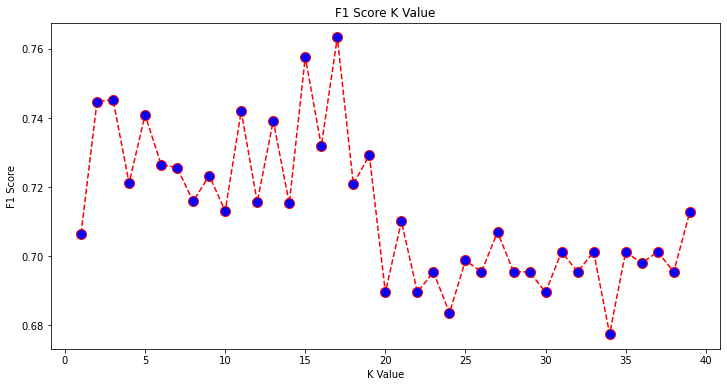

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

O modelo KNN performará melhor com o valor de K=17

* Modelo KNN

In [283]:
#Definindo a função, que recebe a base de dados e o classificador

def modelo_classificador_KNN(df_novo,classificador):
    y = df_novo['default'] #definindo a coluna do y
    X = df_novo.drop(columns = 'default') #definindo as colunas do x
    
    #1) Separando em treino e teste
    SEED = 77
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
    base_treino = X_train.shape[0]
    base_teste = X_test.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))
    print(100*'-')
    
    #2) Feature Scalling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #2) Criando o modelo
    modelo = classificador
    modelo.fit(X_train,y_train)
    
    #3) Matriz Confusão
    matriz_confusao = plot_confusion_matrix(modelo, X_test, y_test, values_format = '3g', cmap = 'Blues')
    plt.title('Matriz de Confusão')
    plt.show
    
    #4) Acurácia, Classification Report e Métricas
    y_predict = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_predict) 
    acuracia = round(acuracia,2)*100
    print(100*'-')
    avaliacao(modelo, X_train, y_train, cv = 5)
    print(100*'-')
    print('Acurácia:',acuracia)
    print(100*'-')
    print('Classification Report:')
    print(classification_report(y_test,y_predict))

    
    #5) Curva ROC e AUC
    print(100*'-')
    prob_previsao = modelo.predict_proba(X_test)[:,1]
    tfp,tvp,limite = roc_curve(y_test,prob_previsao)
    print('roc_auc:',roc_auc_score(y_test, prob_previsao))
    print(100*'-')
    

    plt.figure(figsize = (5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()
    
    
    return modelo,matriz_confusao,acuracia

In [279]:
from sklearn.neighbors import KNeighborsClassifier

#Chamando o modelo
modelo_classificador = KNeighborsClassifier(n_neighbors=17)

#Treinando o modelo com os dados de teste
modelo_classificador.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=17)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: KNeighborsClassifier(n_neighbors=17)
Acurácia média: 0.71 (Intervalo de acurácia: =[69.41% ~ 73.45%])
Precisão média: 0.59 (Intervalo de precisão: =[50.81% ~ 67.11%])
Recall médio: 0.22 (Intervalo de Recall: =[14.32% ~ 29.62%])
----------------------------------------------------------------------------------------------------
Acurácia: 80.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       214
           1       0.93      0.33      0.48        86

    accuracy                           0.80       300
   macro avg       0.86      0.6

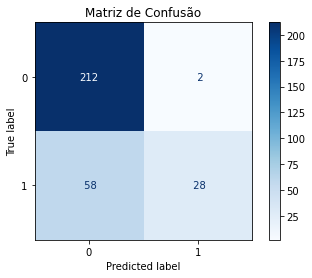

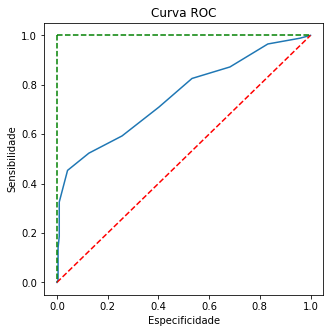

(KNeighborsClassifier(n_neighbors=17),
 80.0)

In [282]:
modelo_classificador_KNN(dados,modelo_classificador)

* Modelo Bagging

In [271]:
bagging = BaggingClassifier(KNeighborsClassifier(),
                                   n_estimators = 20,
                                   max_samples = 0.5, 
                                   max_features = 0.5)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=20)
Acurácia média: 0.71 (Intervalo de acurácia: =[68.83% ~ 73.74%])
Precisão média: 0.67 (Intervalo de precisão: =[38.49% ~ 95.62%])
Recall médio: 0.13 (Intervalo de Recall: =[3.48% ~ 22.70%])
----------------------------------------------------------------------------------------------------
Acurácia: 77.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       214
           1       0.90      0.22      0.36        8

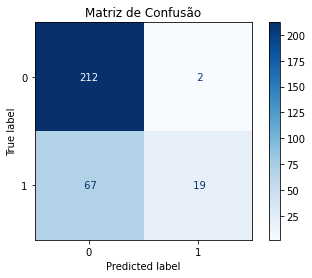

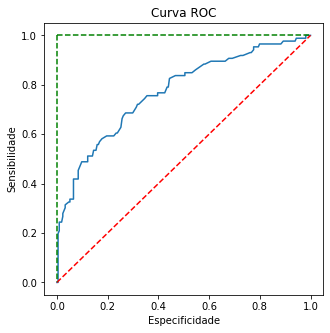

(BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                   max_samples=0.5, n_estimators=20),
 77.0)

In [284]:
modelo_classificador_KNN(dados,bagging)

## 7.5) Gradiente Boosting vs XGBoost

O Gradient Boosting é uma técnica de aprendizado de máquina de ensemble que se baseia em aperfeiçoar previsões de modelos fracos (geralmente árvores de decisão) ao adicionar modelos adicionais aos erros cometidos pelos modelos anteriores. O algoritmo utiliza o gradiente da função de perda para direcionar o próximo modelo adicionado na direção da minimização da perda.

O XGBoost usa árvores de decisão como base para seu algoritmo de aprendizado por reforço de gradiente. Ele constrói várias árvores de decisão em sequência e usa os erros dessas árvores para melhorar as árvores subsequentes. Isso permite que o modelo ajuste gradualmente seus parâmetros para se ajustar aos dados de treinamento

* Gradiente Boosting

* Modelo V1

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [290]:
gboost = GradientBoostingClassifier(n_estimators = 200, 
                                    max_depth = 3)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: GradientBoostingClassifier(n_estimators=200)
Acurácia média: 0.76 (Intervalo de acurácia: =[67.22% ~ 84.49%])
Precisão média: 0.64 (Intervalo de precisão: =[46.56% ~ 81.21%])
Recall médio: 0.5 (Intervalo de Recall: =[36.05% ~ 63.09%])
----------------------------------------------------------------------------------------------------
Acurácia: 77.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       214
           1       0.62      0.48      0.54        86

    accuracy                           0.77       300
   macro avg       0.71  

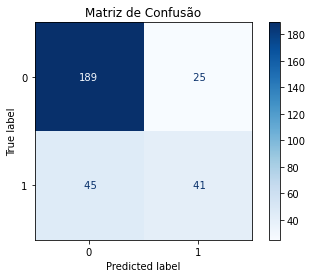

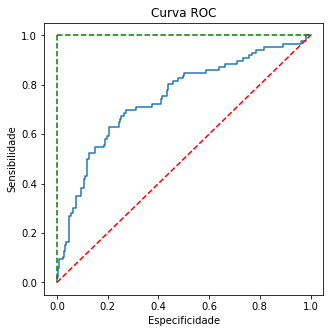

(GradientBoostingClassifier(n_estimators=200),
 77.0)

In [291]:
modelo_classificador(dados,gboost)

* Modelo V2 - GridSearch

In [319]:
# Grid de parâmetros
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 5, 6],
              'min_samples_leaf': [3, 4, 5],
              #'subsample': [0.3, 0.5, 0.7],
              #'n_estimators': [50, 200, 400]
              }

In [320]:
grid_search = GridSearchCV(gboost, param_grid = param_grid, return_train_score = True)

In [321]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=200),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [3, 4, 5]},
             return_train_score=True)

In [322]:
# Imprimindo o melhor estimador
bestclf_GS = grid_search.best_estimator_
print (bestclf_GS)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, n_estimators=200)


In [323]:
gboost_v2 = GradientBoostingClassifier(n_estimators = 200, 
                                       max_depth = 4,
                                       min_samples_leaf=5)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, n_estimators=200)
Acurácia média: 0.76 (Intervalo de acurácia: =[71.30% ~ 81.27%])
Precisão média: 0.66 (Intervalo de precisão: =[52.52% ~ 78.84%])
Recall médio: 0.5 (Intervalo de Recall: =[37.83% ~ 62.24%])
----------------------------------------------------------------------------------------------------
Acurácia: 77.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       214
           1       0.61      0.50      0.55        86

    accuracy                           0.77   

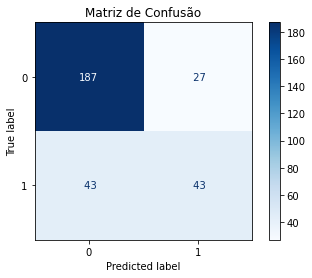

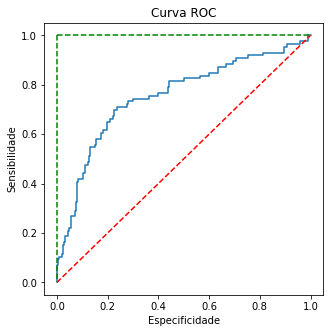

(GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, n_estimators=200),
 77.0)

In [324]:
modelo_classificador(dados,gboost_v2)

* XGBoost

In [1]:
import xgboost as xgb

* Modelo V1 simples de XGBoost

In [2]:
xgbc = xgb.XGBClassifier()

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predic

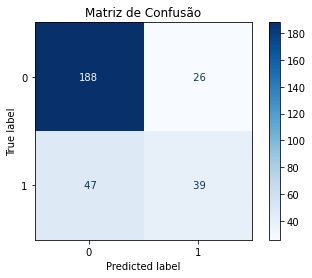

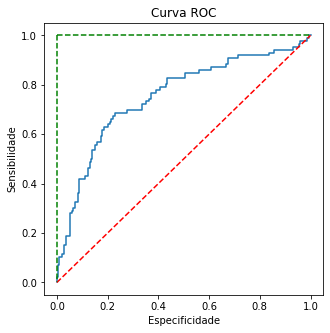

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 76.0)

In [26]:
modelo_classificador(dados,xgbc)

* Modelo v2 com RandomizedSearchCV:

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_dist = { "n_estimators":np.linspace(100,1000,10, dtype=np.int), 
                "max_depth":np.arange(4, 21, 1, dtype=np.int),
                "learning_rate": np.linspace(0,1,11)
              }

In [34]:
rsearch = RandomizedSearchCV(xgbc, 
                             param_distributions = param_dist, 
                             n_iter = 8, #poucas iterações se não fica pesado
                             return_train_score = True
                            )  

In [36]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_

In [37]:
# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [38]:
xgbc_v2 = xgb.XGBClassifier(max_depth=11,
                            learning_rate=0.4,
                            n_estimators=100
                           )

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor

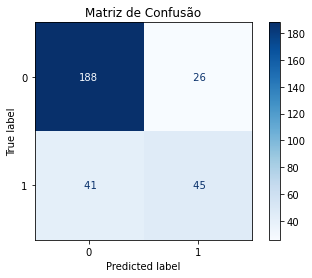

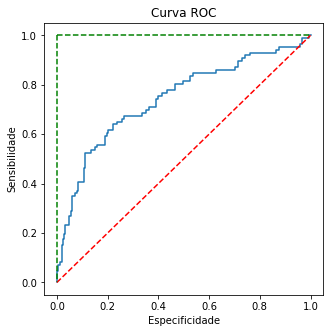

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.4, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=11, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 78.0)

In [39]:
modelo_classificador(dados,xgbc_v2)

* Modelo v3 com GridSearch:

In [41]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = { 
              "learning_rate": [0,5,11],
              "max_depth":[4,10,21],
              "n_estimators":[100,250,700]
              }

In [47]:
grid_search = GridSearchCV(xgbc, param_grid = param_grid, return_train_score = True)

In [48]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [49]:
# Imprimindo o melhor estimador
bestclf = grid_search.best_estimator_
print (bestclf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [52]:
xgbc_v3 = xgb.XGBClassifier(max_depth=4,
                            learning_rate=0.5,
                            n_estimators=100
                           )

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=

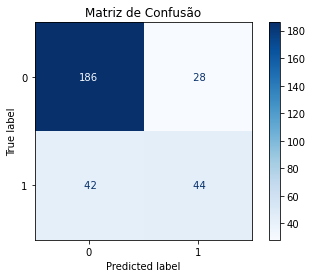

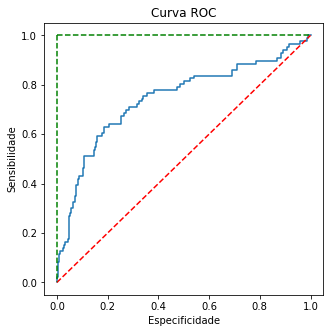

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.5, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 77.0)

In [53]:
modelo_classificador(dados,xgbc_v3)

## 8) Conclusão Final

Vamos comparar agora os resultados de todos os modelos de classificação criados até o momento e analisar a acurácia, precisão, recall, AUC e quantos clientes de alto risco receberam crédito de forma errônea (sendo este um ponto muito importante a se considerar em um possível desempate).

### 1) Modelo de  Regressão Logística

* #### V1

Modelo de regressão logística testado com a base de dados e todas as suas features

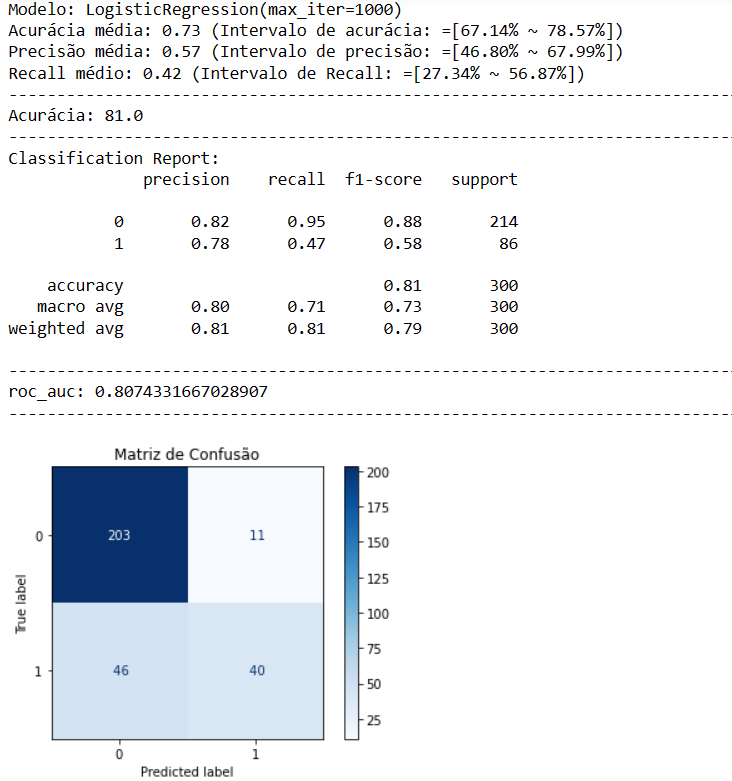
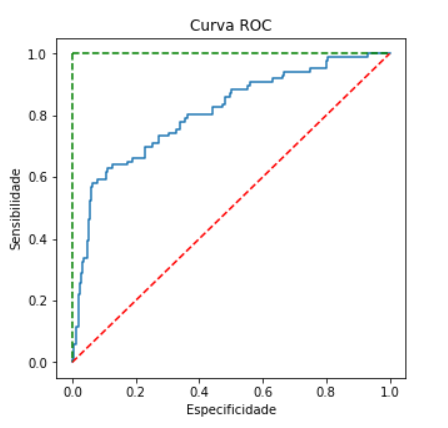

* #### V2

Modelo de regressão logística realizado apenas com as features mais importantes

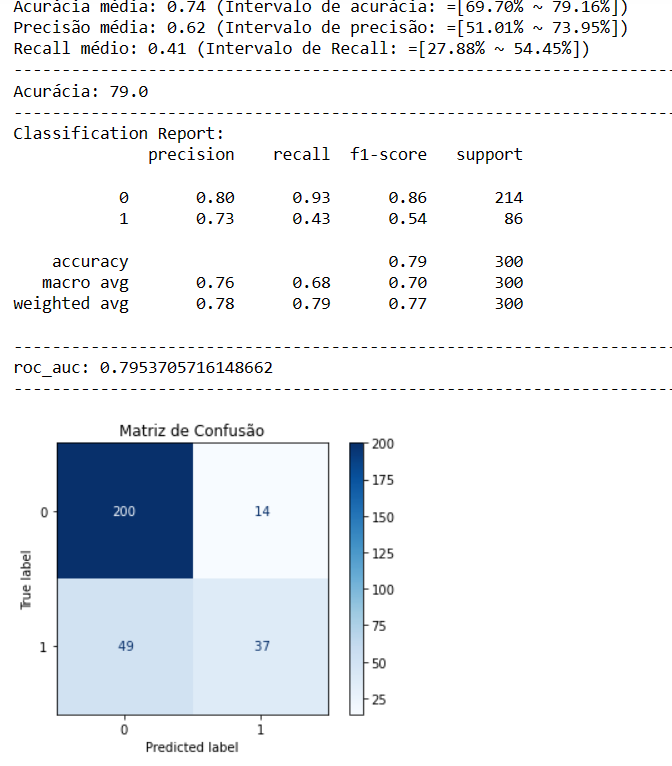
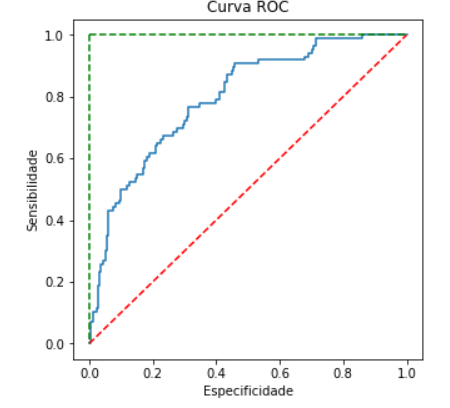

Dos modelos de Regressão logística o V2 é um forte candidato. O mesmo possui Acurácia média e AUC bem similar ao modelo V1, porém com uma precisão média ligeiramente maior. O modelo V1 concedeu crédito de forma errônea para menos clientes ligeiramente menor em relação ao modelo V2, porém o modelo V2 por conter apenas as features necessárias pode se tornar mais viável para ser utilizado e para fazer previsões futuras.

### Modelo de Árvore de Decisão

Árvore de decisão utilizando o critério de entropia e min_sample_leaf = 15

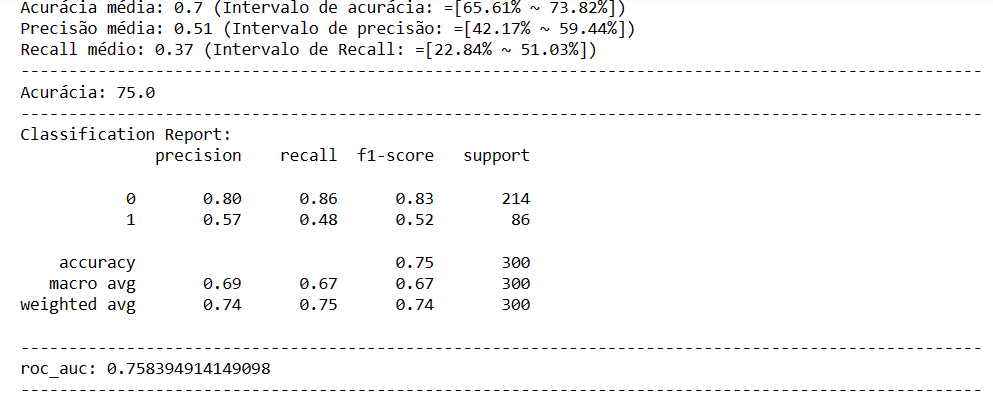
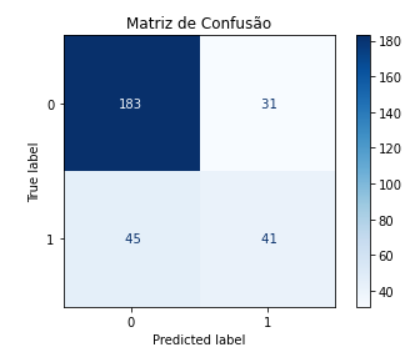
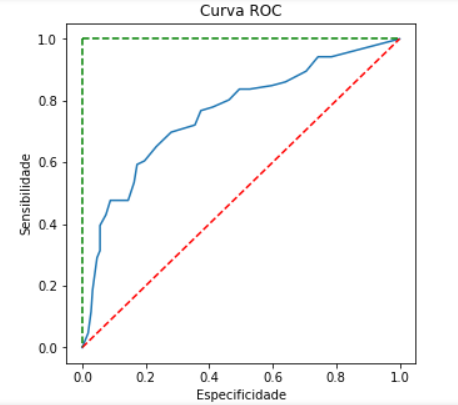

Em relação aos outros modelos o modelo de DecisionTree apresentou uma acurácia e uma precisão média menor

### Modelo de RandomForest

* #### V1

Modelo com hiperparâmetros no default e com n_estimator = 50

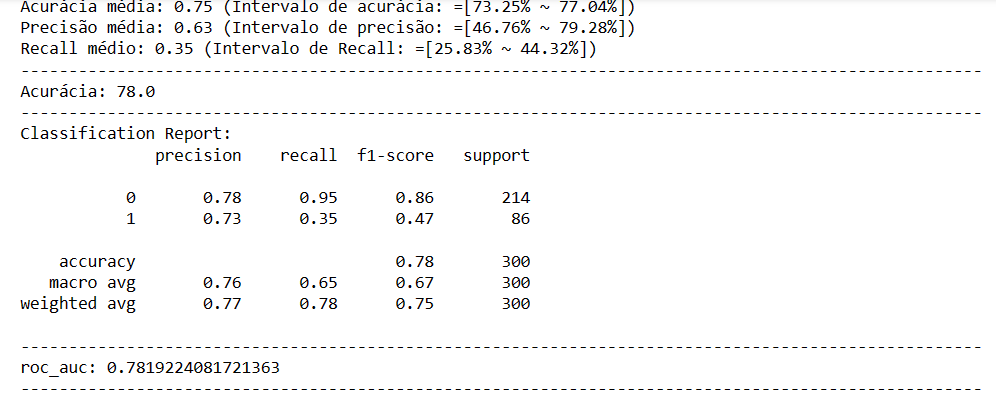
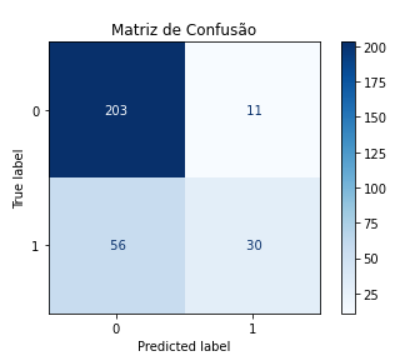
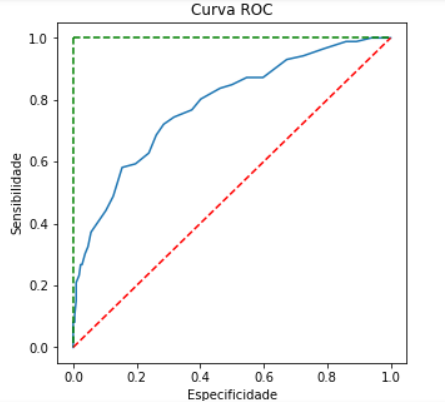

* #### V2

Modelo com n_estimator = 50 e criterion=entropy

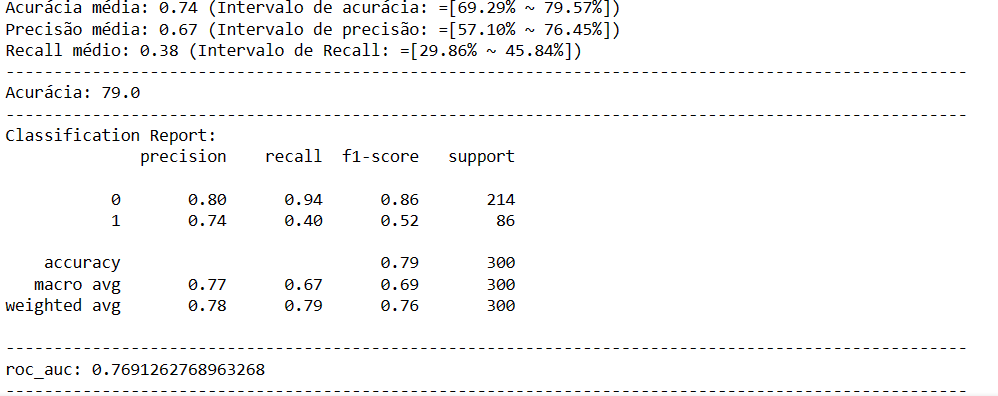
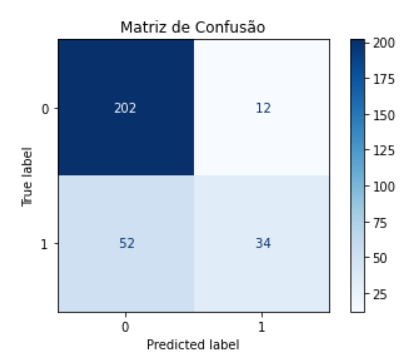
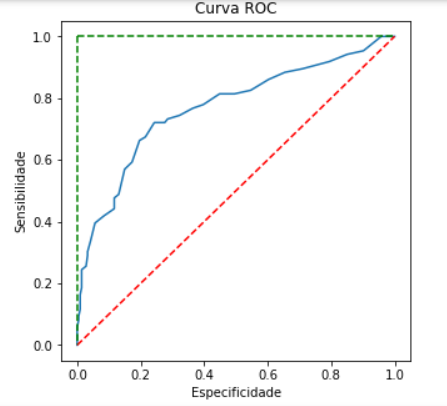

* #### V3

Modelo de RandomForest com os seguintes hiperparâmetros testados e encontrados pelo método RandomizedSearch:

criterion='entropy',max_depth=12,n_estimators = 50,max_features=None,min_samples_split=8,min_samples_leaf=2

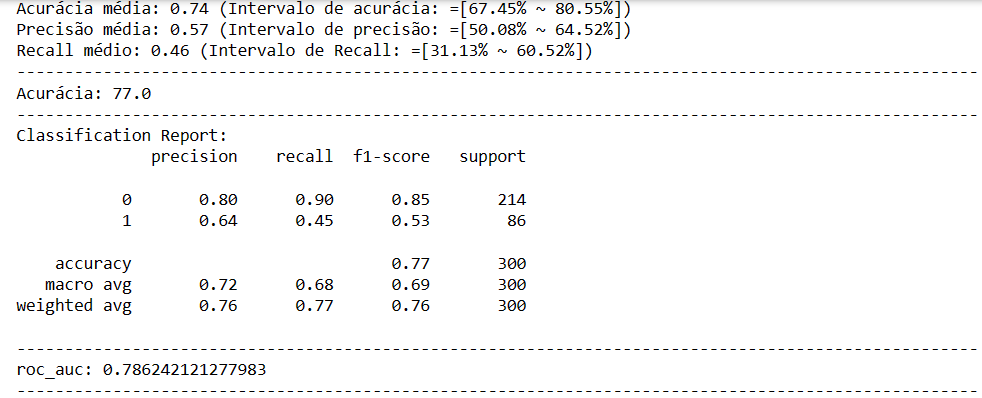
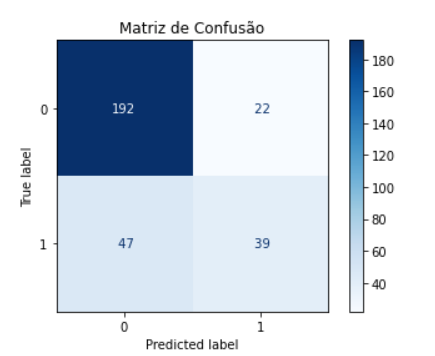
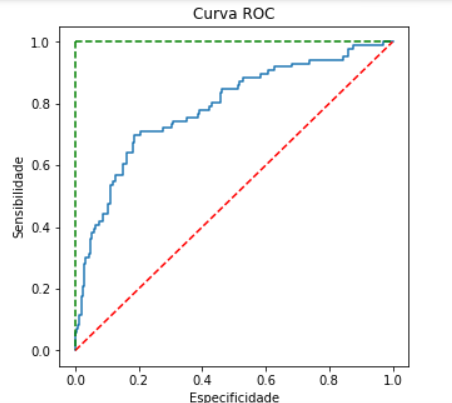

* #### V4

Modelo de RandomForest com os seguintes hiperparâmetros testados e encontrados pelo método GridSearch:

criterion='entropy',n_estimators = 50,max_features=3

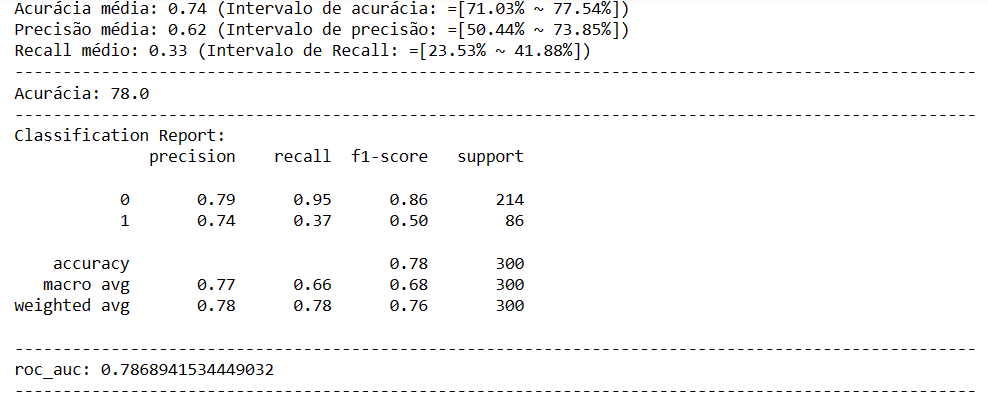
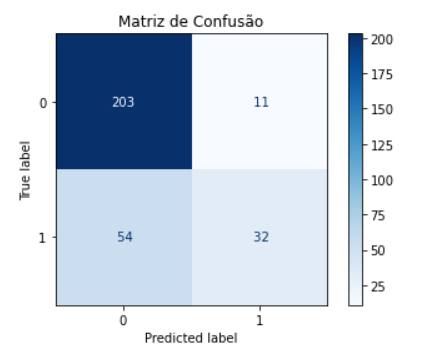
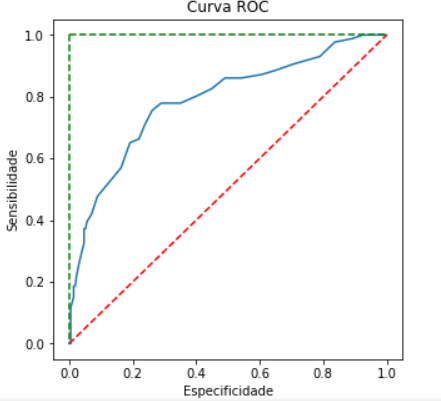

O melhor modelo de RandomForest foi o V3, tendo uma acurácia média de 0.74 uma AUC de 0.78, ligeiramente similar ao modelo V1. Apesar da precisão ser mais baixa, o mesmo errou apenas 47 clientes, enquanto o restante obteve erros maiores.

### KNN

Modelo KNN utilizando n_neighbors ou K=17 (testado por função obtendo o maior F1-Score)

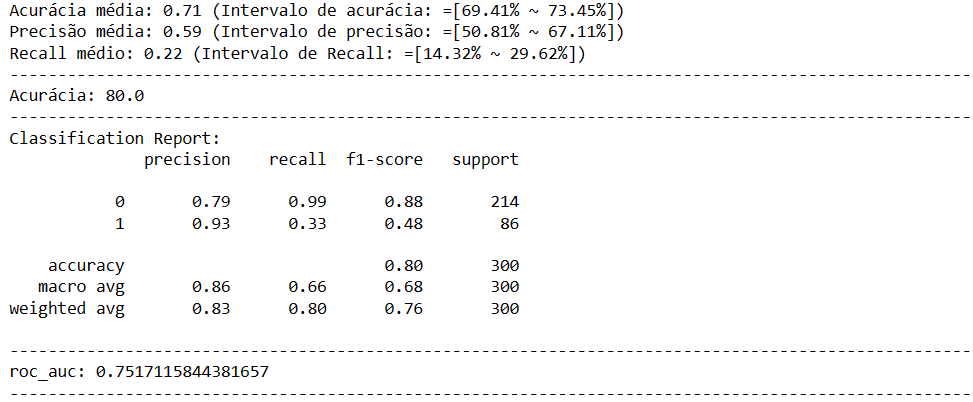
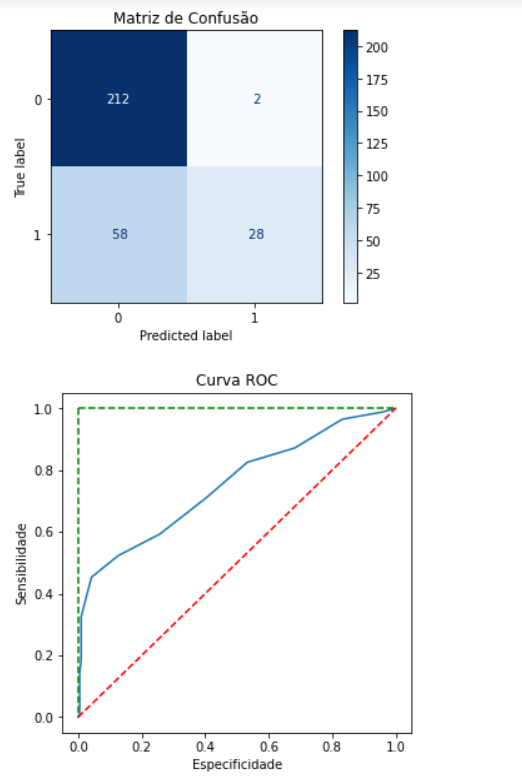

### Modelo Ensemble Bagging

Modelo Ensemble do tipo Bagging, utilizando o KNN como modelo principal e com os hiperparâmetros: 

n_estimators = 20, max_samples = 0.5,  max_features = 0.5

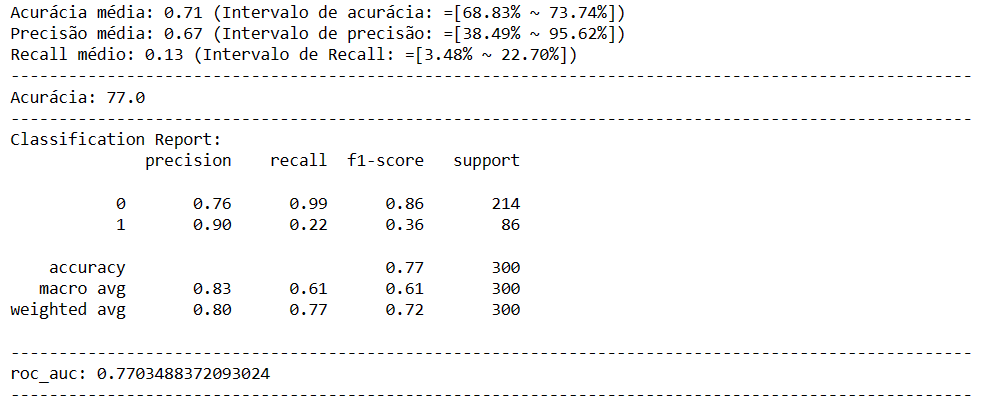
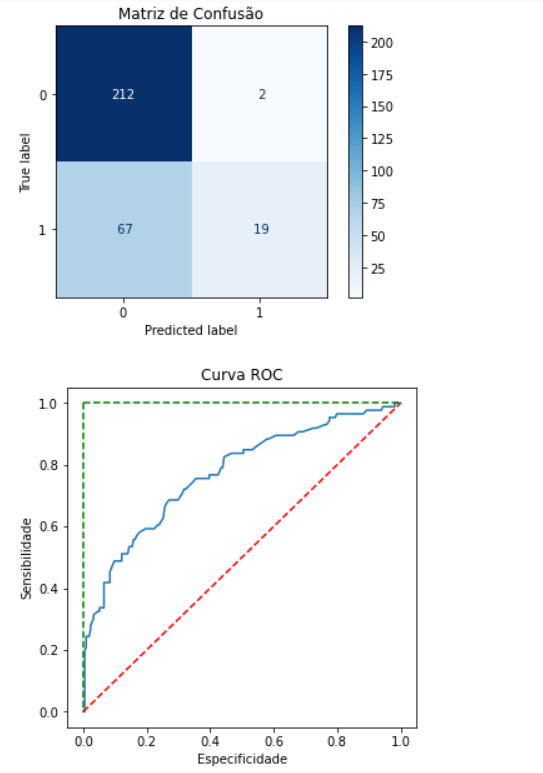

### Modelo Ensemble Gradient Boosting

* #### V1

Modelo Ensemble do tipo Gradient Boosting com os seguintes hiperparâmetros: 

n_estimators = 200, max_depth = 3

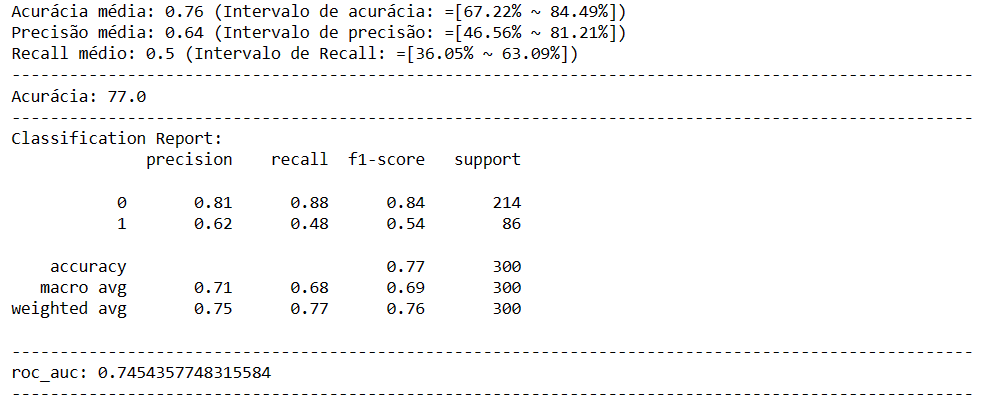
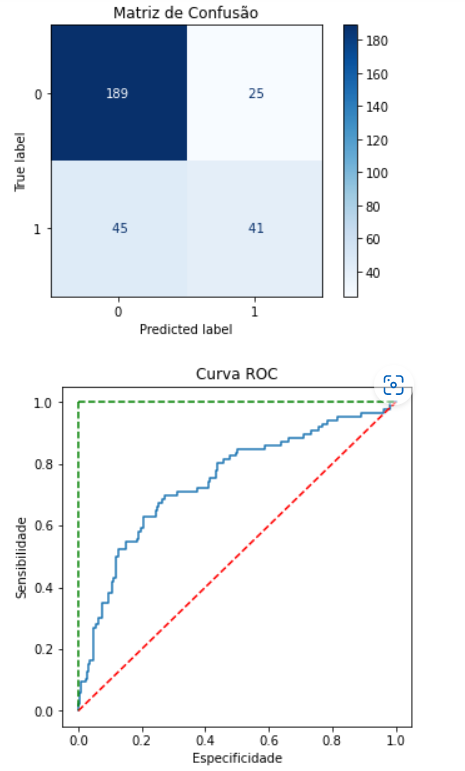

* #### V2

Modelo Ensemble do tipo Gradient Boosting com os seguintes hiperparâmetros encontrados e testados pelo método GridSearch:

n_estimators = 200, max_depth = 4,min_samples_leaf=5)

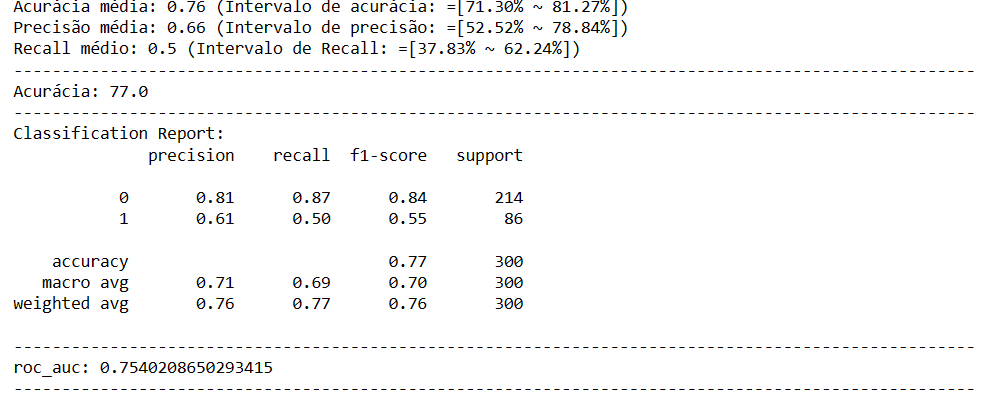
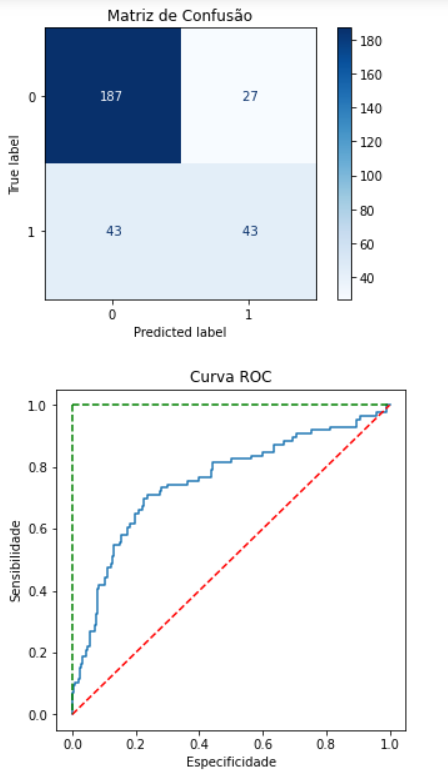

O modelo V2 do gradiente boosting foi melhor em relação ao V1 em basicamente todas as métricas.

### Modelo Ensemble XGBoost

* #### V1

Modelo Ensemble do tipo XGBoost com todos os hiper parâmetros setados no default

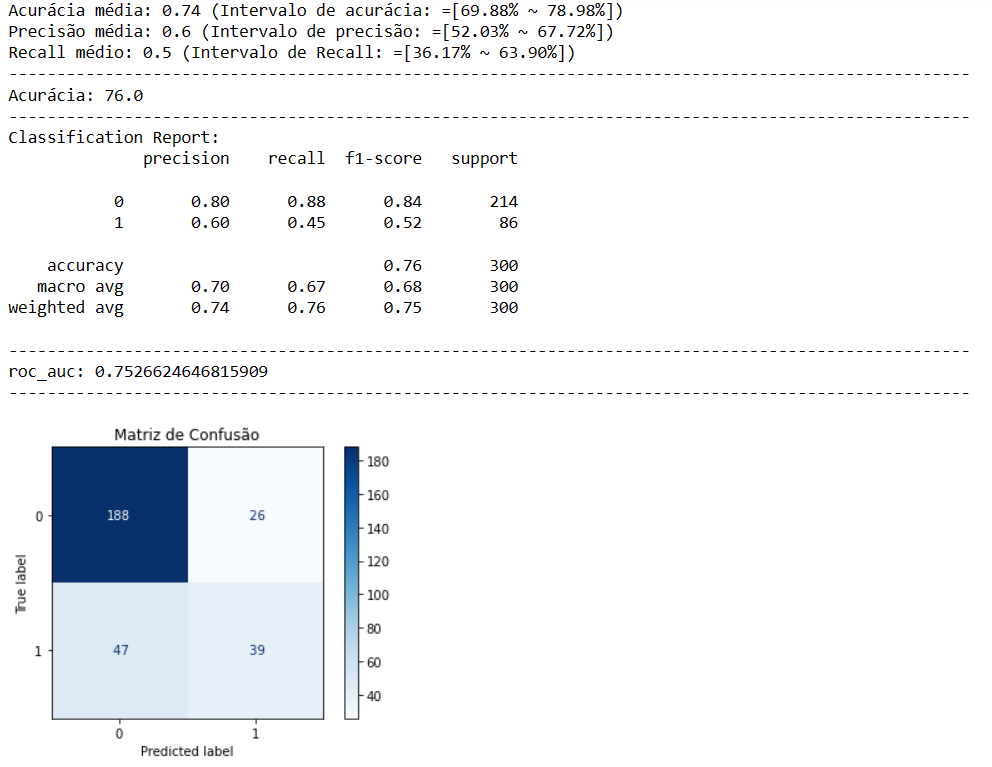
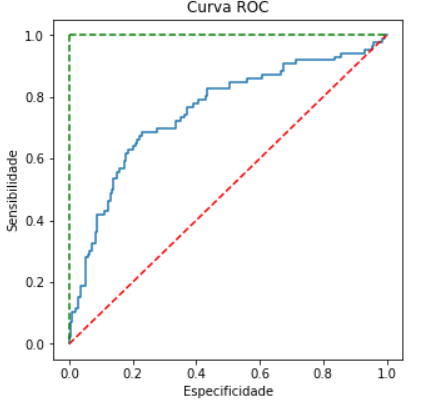

* #### V2

Modelo Ensemble do tipo XGBoost com todos os hiper parâmetros encontrados pelo método RandomizedSearch:

max_depth=11,learning_rate=0.4,n_estimators=100

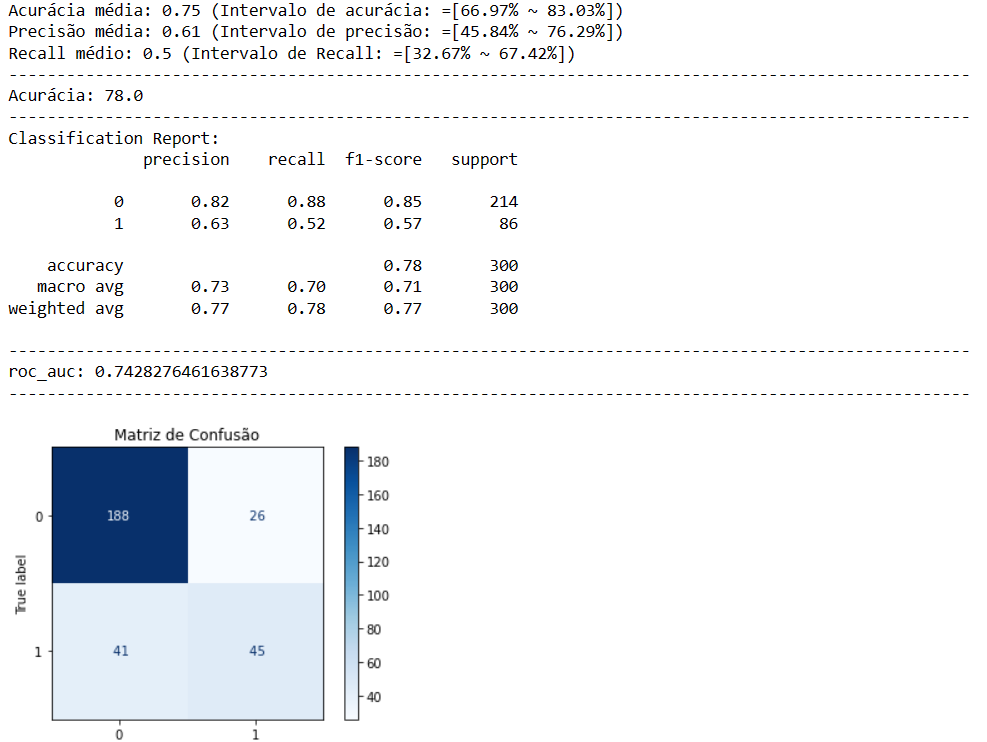
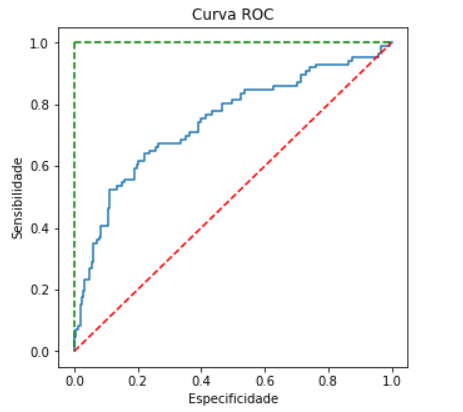

* #### V3

Modelo Ensemble do tipo XGBoost com todos os hiper parâmetros encontrados pelo método GridSearch:

max_depth=4,learning_rate=0.5,n_estimators=100

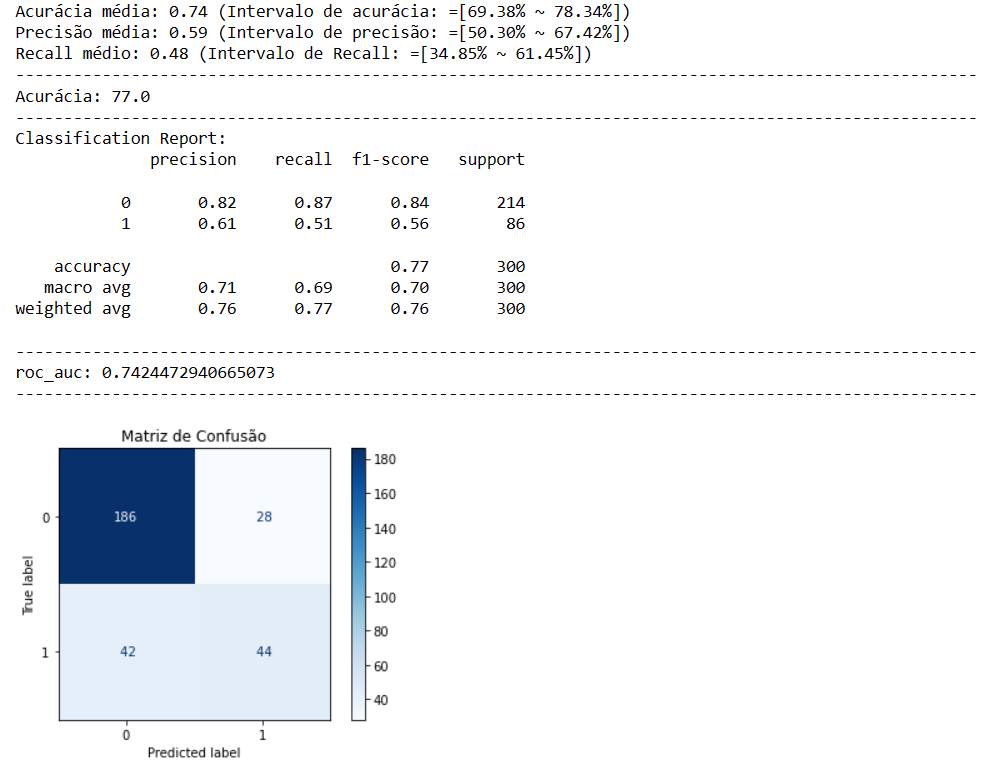
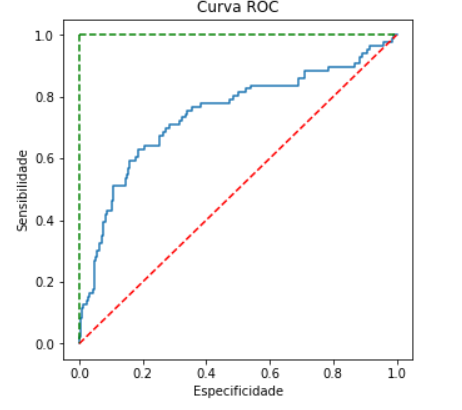

Dos modelos de XGBoost o modelo V2 foi o melhor dentre eles, também com quase todas as métricas ligeiramente superiores, além de ter errado menos na previsão de concessão de crédito para pessoas de alto risco

### Melhores Modelos - Decisão

Chegou o momento de decidir qual dos modelos é o melhor para ser implementado. Vale lembrar que os modelos ainda podem ser tratados novamente buscando novos parâmetros para buscar seu aperfeiçoamento. A avaliação ficará por conta das mesmas métricas e do quanto o modelo errou em conceder crédito à clientes arriscados

#### * Modelo V1 - Regressão Logística

Acurácia: 0.73

Precisão: 0.57

Recall: 0.42

AUC: 0.80

Nº Previsões Erradas: 46

#### * Modelo V2 - Regressão Logística

Acurácia: 0.74

Precisão: 0.62

Recall: 0.41

AUC: 0.79

Nº Previsões Erradas: 49

#### * Modelo V3 - RandomForest

Acurácia: 0.74

Precisão: 0.57

Recall: 0.46

AUC: 0.78

Nº Previsões Erradas: 47

#### * Modelo KNN

Acurácia: 0.71

Precisão: 0.59

Recall: 0.22

AUC: 0.75

Nº Previsões Erradas: 58

#### * Modelo V2 - GBoost

Acurácia: 0.76

Precisão: 0.66

Recall: 0.50

AUC: 0.75

Nº Previsões Erradas: 43

#### * Modelo V2 - XGBoost

Acurácia: 0.75

Precisão: 0.61

Recall: 0.50

AUC: 0.74

Nº Previsões Erradas: 41

## 9) Modelo Escolhido

O modelo escolhido será o modelo V2 cujo algoritmo utilizado foi o Ensemble Gradient Boosting, por ter a melhor Acurácia, Precisão e Recall Médio em relação a todos os outros modelos. A pontuação AUC não foi a melhor, porém foi ligeiramente próxima da maior (0.80 do modelo V1 de Regressão Logística) e teve o 2º menor número de previsões erradas (43) logo atrás do modelo V2 do método de XGBoost com 41, ou seja, empate técnico

* GradientBoostingClassifier 